# **Sentiment Analysis Kandidat Presiden Indonesia 2024**

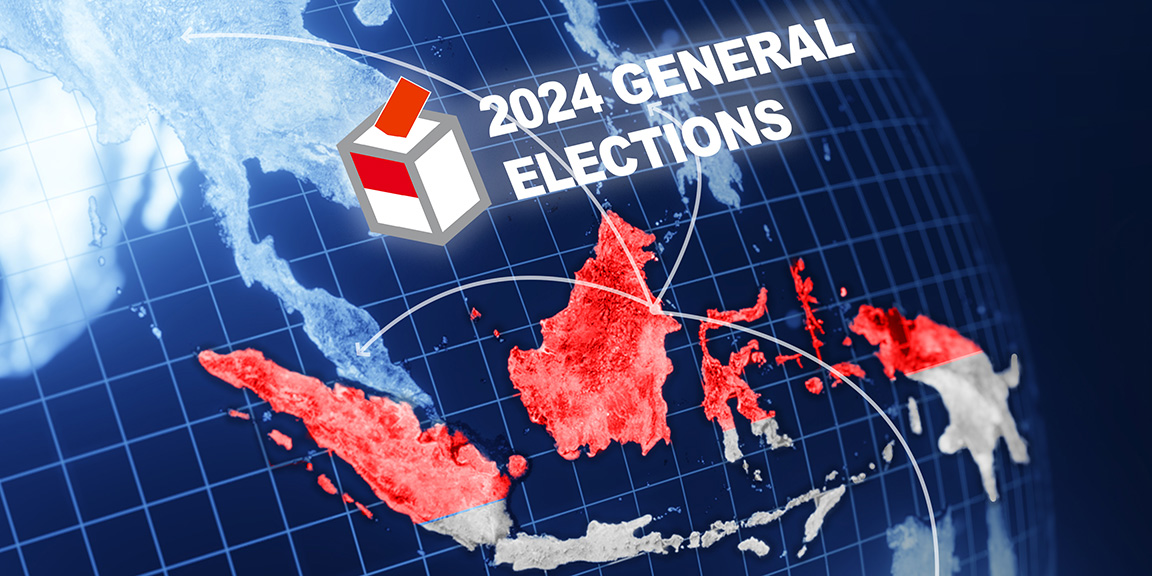

Notebook ini memproses dan menganalisis dataset sentimen tweet terkait tiga kandidat Presiden Indonesia 2024: Anies Baswedan, Prabowo Subianto, dan Ganjar Pranowo. Tujuan analisis ini adalah memahami distribusi sentimen, menemukan pola kata yang signifikan, dan menampilkan tren sentimen dari waktu ke waktu.

## **1. Instalasi dan Persiapan Lingkungan**

Untuk memulai, kita akan menginstal pustaka yang diperlukan. Beberapa pustaka seperti `tensorflow`, `transformers`, dan `gdown` digunakan untuk pengolahan data dan model.

In [ ]:
!pip install gdown clean-text spacy emoji unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=05207a0bf46ec180011a86be21241b3cfad8148827f01216972faed406a0ed0d
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
!pip uninstall -y transformers torch
!pip install transformers[tf]

Found existing installation: transformers 4.46.3
Uninstalling transformers-4.46.3:
  Successfully uninstalled transformers-4.46.3
Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/

In [ ]:
!pip uninstall tf-keras
!pip install tf-keras==2.18.0

Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tf_keras-2.15.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tf_keras/*
Proceed (Y/n)? Y
  Successfully uninstalled tf_keras-2.15.1
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.5 MB/s eta 0:00:00
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.8 MB/s eta 0:00:00
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    

## **2. Import Library**

Kita akan mengimpor pustaka-pustaka penting yang dibutuhkan untuk analisis. Pustaka ini mencakup:

- **Pandas** dan **Numpy** untuk manipulasi data.
- **Matplotlib** dan **Seaborn** untuk visualisasi data.
- **Scikit-learn** untuk pengolahan dan evaluasi model.
- **Transformers** untuk pemodelan berbasis BERT.
- **NLTK** untuk analisis teks.

In [ ]:
# Import pustaka
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score,
    precision_score, recall_score
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler, SMOTE
from transformers import BertTokenizerFast, TFBertModel
import gdown
import zipfile
from itertools import cycle
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

## **3. Download dan Ekstraksi Data**

Pada langkah ini, kita akan mengunduh dan mengekstrak data dari Google Drive menggunakan pustaka `gdown`.

In [ ]:
# ID file Google Drive
file_id = '16lB8ihk--e5Q1bBkVqIeHn2q_R-E-Bzd'
# URL untuk mendownload file
url = f'https://drive.google.com/uc?id={file_id}'
# Nama file output
output = 'dataset.zip'

# Download file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16lB8ihk--e5Q1bBkVqIeHn2q_R-E-Bzd
To: /content/dataset.zip
100%|██████████| 7.14M/7.14M [00:00<00:00, 21.7MB/s]


'dataset.zip'

In [ ]:
# Ekstraksi file
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')

## **4. Load Dataset**

Dataset yang telah diekstrak terdiri dari tiga file CSV, masing-masing berisi data tweet untuk tiga kandidat Presiden.

**Langkah-langkah:**

1. **Membaca File CSV:** File CSV dibaca ke dalam DataFrame menggunakan `pandas`.
2. **Informasi Data:** Melihat struktur dan informasi dasar dataset.

In [ ]:
# Read dataset
anies_data = pd.read_csv('dataset_folder/Indonesia Presidential Candidates Dataset, 2024/labeled data/Anies Baswedan.csv')
prabowo_data = pd.read_csv('dataset_folder/Indonesia Presidential Candidates Dataset, 2024/labeled data/Prabowo Subianto.csv')
ganjar_data = pd.read_csv('dataset_folder/Indonesia Presidential Candidates Dataset, 2024/labeled data/Ganjar Pranowo.csv')

In [ ]:
# Informasi dataset kandidat anies
anies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    10000 non-null  int64  
 1    Date           10000 non-null  object 
 2    Created        10000 non-null  object 
 3    User ID        10000 non-null  float64
 4    Followers      10000 non-null  int64  
 5    Following      10000 non-null  int64  
 6    Tweet Count    10000 non-null  int64  
 7    TweetLocation  4960 non-null   object 
 8   Text            9934 non-null   object 
 9   label           9997 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 781.4+ KB


Informasi umum tentang dataset Anies Baswedan, dengan 10.000 entri dan 10 kolom. Beberapa kolom memiliki data yang hilang, seperti TweetLocation dan Text, yang mungkin perlu penanganan lebih lanjut. Kolom lainnya memiliki data lengkap.

In [ ]:
# Informasi dataset kandidat prabowo
prabowo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    10000 non-null  int64  
 1    Date           10000 non-null  object 
 2    Created        10000 non-null  object 
 3    User ID        10000 non-null  float64
 4    Followers      10000 non-null  int64  
 5    Following      10000 non-null  int64  
 6    Tweet Count    10000 non-null  int64  
 7    TweetLocation  3552 non-null   object 
 8   Text            9912 non-null   object 
 9   label           10000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 781.4+ KB


Informasi umum tentang dataset Prabowo, dengan 10.000 entri dan 10 kolom. Kolom TweetLocation memiliki banyak data yang hilang (sekitar setengahnya), sementara kolom lainnya tidak memiliki data yang hilang.

In [ ]:
# Informasi dataset kandidat ganjar
ganjar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1    Date           10000 non-null  object 
 2    Created        10000 non-null  object 
 3    User ID        10000 non-null  float64
 4    Followers      10000 non-null  int64  
 5    Following      10000 non-null  int64  
 6    Tweet Count    10000 non-null  int64  
 7    TweetLocation  5293 non-null   object 
 8   Text            9885 non-null   object 
 9   label           10000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 781.4+ KB


Informasi tentang dataset Ganjar, yang memiliki 10.000 entri dan 10 kolom. Kolom TweetLocation memiliki sebagian besar data hilang, sementara kolom lainnya lengkap.


## **5. Kombinasi Dataset**

Dataset dari ketiga kandidat akan digabungkan menjadi satu DataFrame agar mempermudah analisis.

**Langkah-langkah:**
1. **Tambahkan Kolom Identitas Kandidat:** Menambahkan kolom "Candidate" untuk setiap dataset.
2. **Gabungkan Dataset:** Menggabungkan dataset menggunakan `pd.concat`.

In [ ]:
# Tambahkan kolom kandidat
anies_data['Candidate'] = 'Anies Baswedan'
prabowo_data['Candidate'] = 'Prabowo Subianto'
ganjar_data['Candidate'] = 'Ganjar Pranowo'

# Menggabungkan dataset
df = pd.concat([anies_data, prabowo_data, ganjar_data])

In [ ]:
# Informasi dataset setelah digabung
df.head()

Unnamed: 0.1                        Date                     Created  \
0           0.0   2023-04-16 10:04:35+00:00   2023-03-27 08:59:57+00:00   
1           1.0   2023-04-16 10:00:01+00:00   2012-08-21 07:34:04+00:00   
2           2.0   2023-04-16 09:14:46+00:00   2011-09-27 05:22:24+00:00   
3           3.0   2023-04-16 07:03:05+00:00   2017-10-19 12:32:28+00:00   
4           4.0   2023-04-16 06:03:59+00:00   2022-06-28 07:03:37+00:00   

        User ID   Followers   Following   Tweet Count       TweetLocation  \
0  1.640000e+18         981         531            22                 NaN   
1  7.710306e+08       10702         123         30121   Palmerah, Jakarta   
2  3.807551e+08          11          35           230       North Jakarta   
3  9.210000e+17          37          47          2670             Jakarta   
4  1.540000e+18           6         129           766       Lebak, Banten   

                                                Text     label  \
0                               anies president info  Positive   
1  gerindra party politician sandiaga uno answers...  Positive   
2  mr. anies continued, we will guard him until h...  Positive   
3  may allah swt save the nation and state of the...  Positive   
4  poor chotimah, uncle anies, that's why my fami...  Positive   

        Candidate  Unnamed: 0  
0  Anies Baswedan         NaN  
1  Anies Baswedan         NaN  
2  Anies Baswedan         NaN  
3  Anies Baswedan         NaN  
4  Anies Baswedan         NaN

Hasil setelah penggabungan kolom Candidate pada masing-masing dataset kandidat dan menggabungkan ketiga dataset menjadi satu. Kolom Candidate menunjukkan nama calon yang terkait dengan setiap entri, sedangkan kolom lainnya berisi data terkait tweet, termasuk teks dan label sentimen.

## **6. Seleksi Kolom dan Penanganan Missing Value**

Kita hanya akan menggunakan kolom penting, yaitu "Tweet Count", "Text", "Label", "Candidate", dan "Date". Selain itu, data dengan nilai kosong akan dihapus.

In [ ]:
# Melihat ukuran dataset
df.shape

(30000, 12)

Ukuran dataset gabungan adalah 30.000 baris dan 12 kolom.

In [ ]:
# Melihat missing value dalam dataset
df.isnull().sum()

Unnamed: 0.1      10000
 Date                 0
 Created              0
 User ID              0
 Followers            0
 Following            0
 Tweet Count          0
 TweetLocation    16195
Text                269
label                 3
Candidate             0
Unnamed: 0        20000
dtype: int64

Selanjutnya, informasi mengenai jumlah data yang hilang (missing values) mengungkapkan bahwa kolom TweetLocation memiliki banyak data kosong (16.195), diikuti oleh Text (269) dan label (3). Kolom Unnamed: 0.1 dan Unnamed: 0 masing-masing memiliki 10.000 dan 20.000 nilai kosong, menunjukkan bahwa kolom-kolom tersebut kemungkinan tidak relevan dan dapat dihapus untuk penyederhanaan analisis.


In [ ]:
# Seleksi kolom yang diperlukan
df = df.loc[:, [' Tweet Count', 'Text', 'label', 'Candidate', ' Date']]

# Hapus data kosong
df = df.dropna()

In [ ]:
# Melihat kembali dataset setelah dilakukan seleksi kolom
df.head()

Tweet Count                                               Text     label  \
0            22                               anies president info  Positive   
1         30121  gerindra party politician sandiaga uno answers...  Positive   
2           230  mr. anies continued, we will guard him until h...  Positive   
3          2670  may allah swt save the nation and state of the...  Positive   
4           766  poor chotimah, uncle anies, that's why my fami...  Positive   

        Candidate                        Date  
0  Anies Baswedan   2023-04-16 10:04:35+00:00  
1  Anies Baswedan   2023-04-16 10:00:01+00:00  
2  Anies Baswedan   2023-04-16 09:14:46+00:00  
3  Anies Baswedan   2023-04-16 07:03:05+00:00  
4  Anies Baswedan   2023-04-16 06:03:59+00:00

In [ ]:
# Melihat kembali struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29728 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  29728 non-null  int64 
 1   Text          29728 non-null  object
 2   label         29728 non-null  object
 3   Candidate     29728 non-null  object
 4    Date         29728 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


Dataset yang telah diseleksi hanya menyisakan kolom-kolom relevan: jumlah tweet, teks, label sentimen, kandidat, dan tanggal. Setelah menghapus data kosong, jumlah baris menjadi 29.728. Struktur dataset kini lebih bersih, tanpa missing values, siap untuk proses analisis lebih lanjut.

In [ ]:
# Melihat statistik deskriptif
df.describe()

Tweet Count
count  2.972800e+04
mean   3.605859e+04
std    1.712621e+05
min    1.000000e+00
25%    5.720000e+02
50%    2.447000e+03
75%    1.432500e+04
max    2.310131e+06

Statistik deskriptif memberikan gambaran umum tentang distribusi jumlah tweet. Rata-rata jumlah tweet adalah 36.058, dengan nilai minimum 1 dan maksimum lebih dari 2,3 juta. Rentang yang luas dan standar deviasi tinggi menunjukkan adanya perbedaan signifikan dalam jumlah tweet di antara pengguna.

In [ ]:
# Mengecek kembali missing value dalam dataset
df.isnull().sum()

Tweet Count    0
Text            0
label           0
Candidate       0
 Date           0
dtype: int64

Dataset sudah bersih dari nilai kosong setelah proses seleksi kolom dan penghapusan data kosong. Semua kolom memiliki jumlah entri yang lengkap, memastikan dataset siap untuk analisis lebih lanjut atau pemodelan.

In [ ]:
# Melihat kembali ukuran dataset
df.shape

(29728, 5)

Dataset memiliki 29.728 baris dan 5 kolom setelah proses seleksi kolom dan penghapusan data kosong. Ukuran ini menunjukkan jumlah data yang tersedia untuk analisis lebih lanjut.

## **7. Eksploratry Data Analysis (EDA)**

### 7.1 Visualisasi Distribusi Data

#### Distribusi Jumlah Tweet per Kandidat

Visualisasi ini menunjukkan distribusi jumlah tweet yang dimiliki masing-masing kandidat.

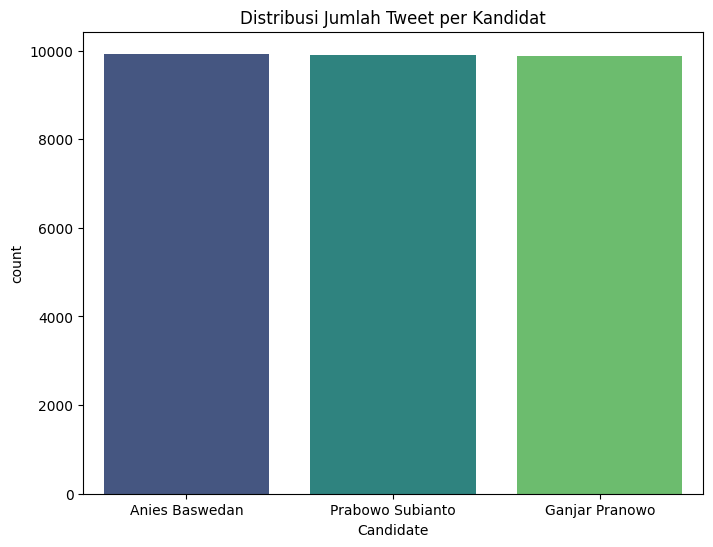

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Candidate', palette="viridis")
plt.title("Distribusi Jumlah Tweet per Kandidat")
plt.show()

Dari plot bar tersebut dapat dilihat bahwa distribusi jumlah tweet masing-masing kandidat hampir memiliki persebaran yang sama.

#### Distribusi Sentimen Secara Keseluruhan

Visualisasi ini memberikan gambaran mengenai jumlah sentimen positif, negatif, dan netral dalam dataset.

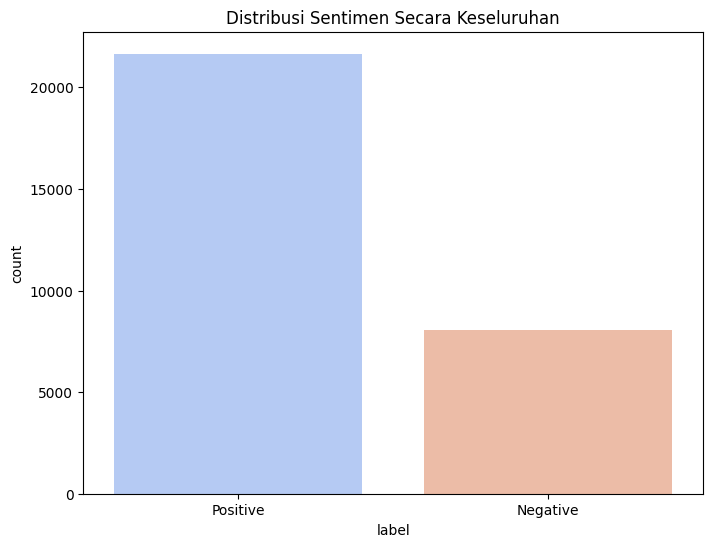

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette="coolwarm")
plt.title("Distribusi Sentimen Secara Keseluruhan")
plt.show()

Dari plot bar tersebut dapat dilihat bahwa distribusi kelas ‘positive’ memiliki lebih banyak persebaran data dibandingkan dengan kelas ‘negative’.

### 7.2 Analisis Panjang Tweet

#### Distribusi Panjang Tweet
Panjang tweet dihitung berdasarkan jumlah kata dalam teks tweet, kemudian divisualisasikan untuk melihat distribusinya.

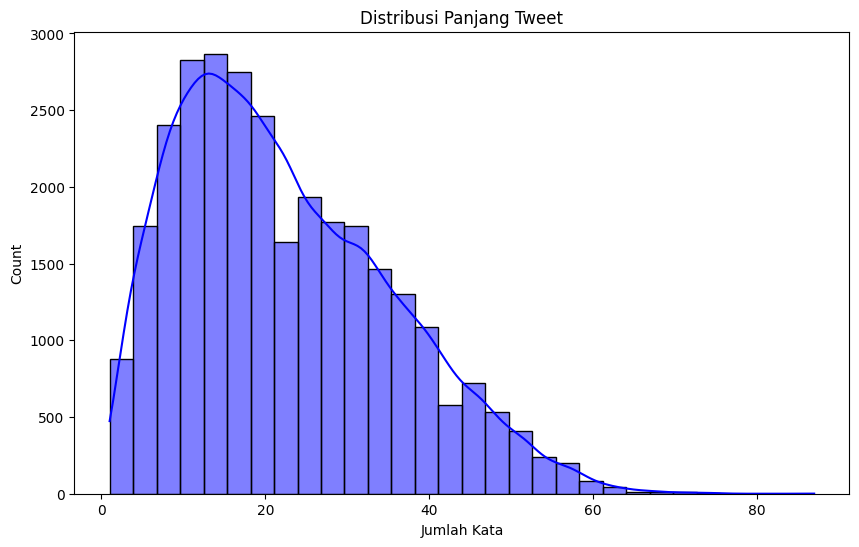

In [ ]:
df['Tweet Length'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['Tweet Length'], bins=30, kde=True, color='blue')
plt.title("Distribusi Panjang Tweet")
plt.xlabel("Jumlah Kata")
plt.show()

Distribusi panjang tweet pada grafik menunjukkan bahwa sebagian besar tweet memiliki panjang sekitar 10–30 kata, dengan puncak distribusi berada di sekitar 20 kata. Kurva distribusi terlihat miring ke kanan, mengindikasikan adanya sejumlah kecil tweet dengan panjang kata yang jauh lebih banyak dari rata-rata.

#### Panjang Tweet Berdasarkan Sentimen
Boxplot ini memperlihatkan perbedaan panjang tweet berdasarkan kategori sentimen (positif, negatif, netral).

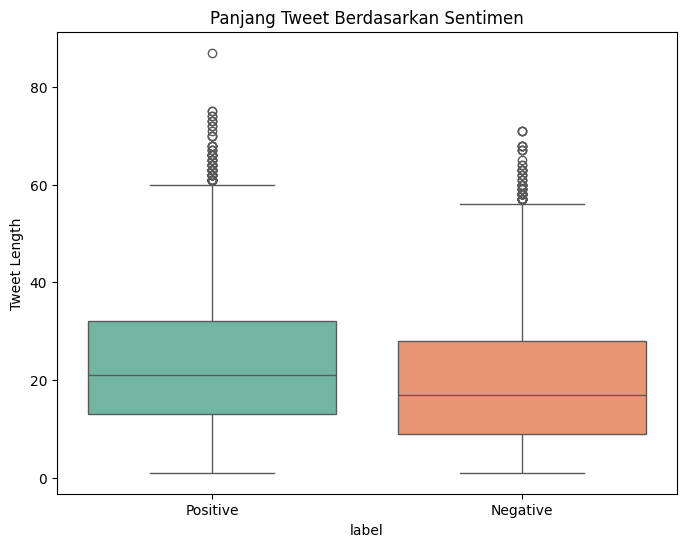

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Tweet Length', data=df, palette="Set2")
plt.title("Panjang Tweet Berdasarkan Sentimen")
plt.show()

Boxplot menunjukkan distribusi panjang tweet berdasarkan sentimen positif dan negatif. Median panjang tweet untuk kedua sentimen terlihat serupa, sekitar 20 kata. Namun, tweet positif cenderung memiliki lebih banyak outlier (tweet sangat panjang) dibandingkan tweet negatif. Distribusi panjang tweet untuk sentimen negatif lebih simetris dibandingkan yang positif. Hal ini menunjukkan bahwa tweet dengan sentimen positif lebih bervariasi dalam panjangnya.

### 7.3 Analisis Temporal

#### Volume Tweet dari Waktu ke Waktu

Analisis ini menunjukkan volume tweet untuk setiap kandidat sepanjang waktu.

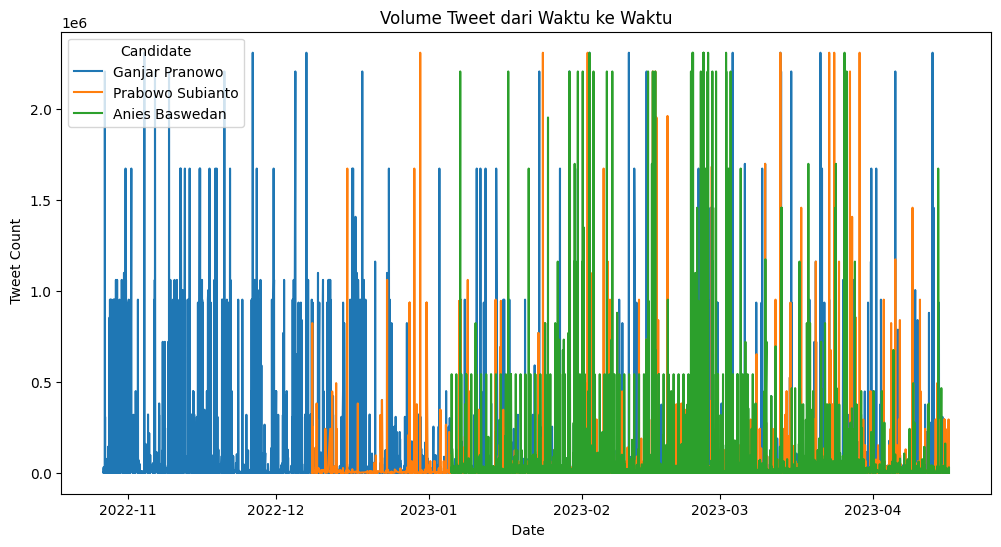

In [ ]:
df[' Date'] = pd.to_datetime(df[' Date'], errors='coerce')

plt.figure(figsize=(12, 6))
grouped_df = df.groupby([' Date', 'Candidate'])[' Tweet Count'].sum().reset_index()
sns.lineplot(data=grouped_df, x=' Date', y=' Tweet Count', hue='Candidate')
plt.title("Volume Tweet dari Waktu ke Waktu")
plt.show()

Grafik menunjukkan fluktuasi volume tweet dari waktu ke waktu untuk masing-masing kandidat.

- Ganjar Pranowo (biru): Volume tweet cenderung stabil dengan beberapa lonjakan signifikan di waktu tertentu di akhir tahun 2022, menunjukkan adanya momen atau peristiwa yang menarik perhatian publik.
- Prabowo Subianto (oranye): Volume tweet cenderung lebih rendah dibanding Ganjar, tetapi memiliki beberapa lonjakan tajam dan memiliki rentang waktu persebaran yang lebih luas dimulai dari awal tahun 2023.
- Anies Baswedan (hijau): Memiliki distribusi volume yang lebih terpusat di bulan-bulan tertentu, terutama menjelang periode tertentu, menunjukkan adanya diskusi yang meningkat terkait dirinya di media sosial.


### 7.4 Analisis Kata

#### Frekuensi Kata Teratas

Kode ini menampilkan kata-kata yang paling sering muncul dalam tweet berdasarkan sentimen dan kandidat.

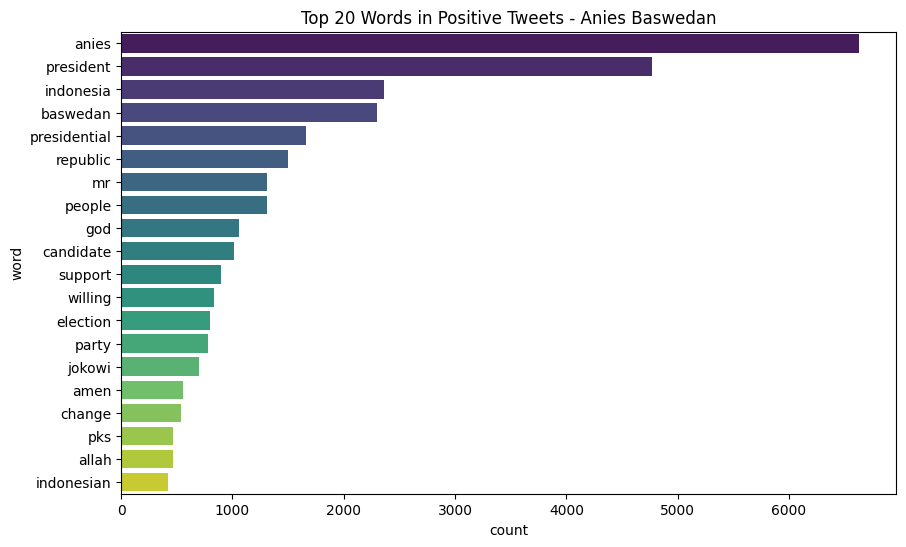

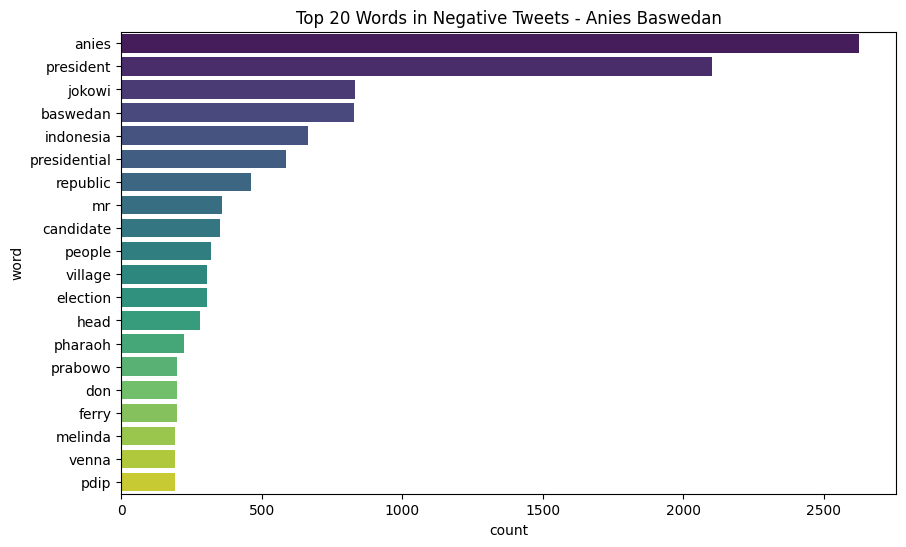

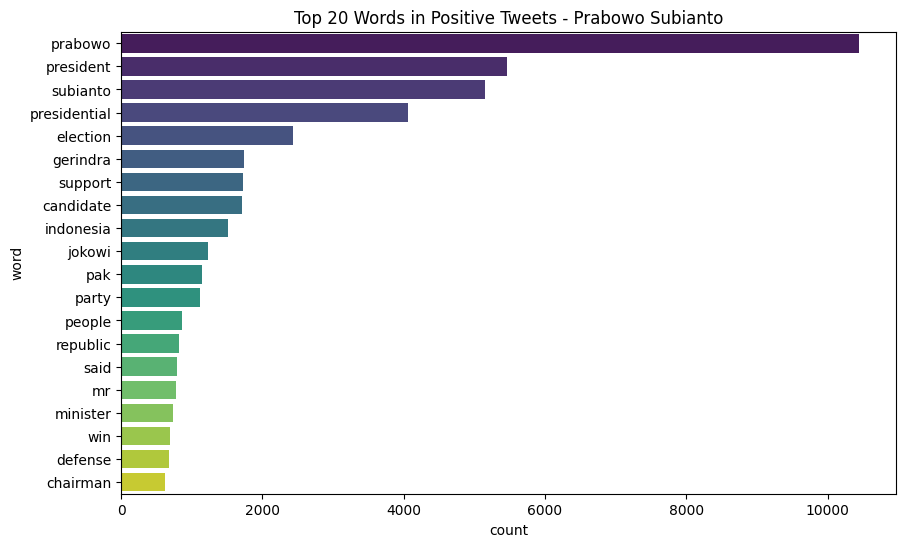

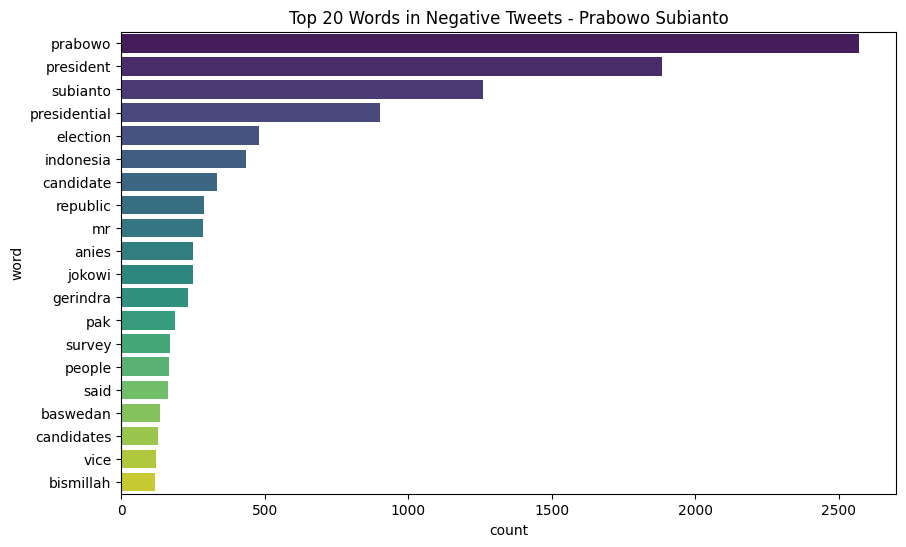

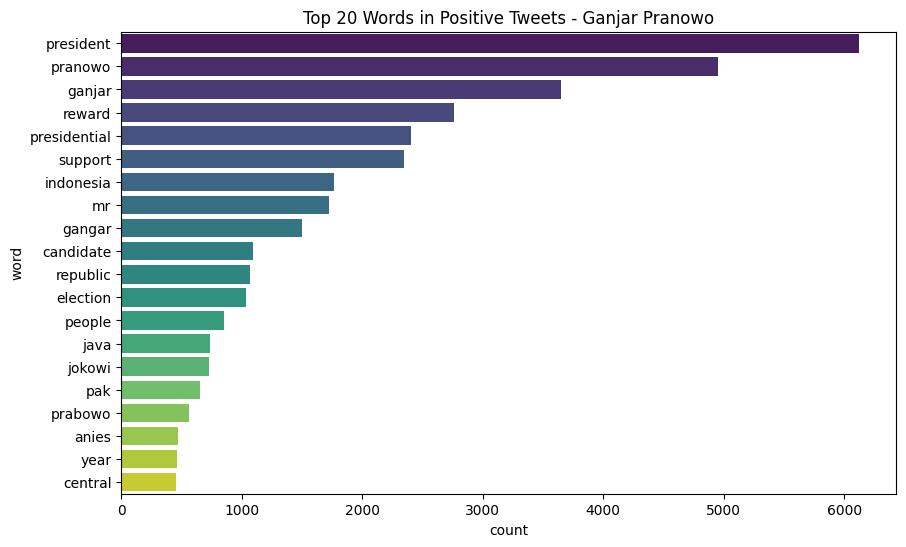

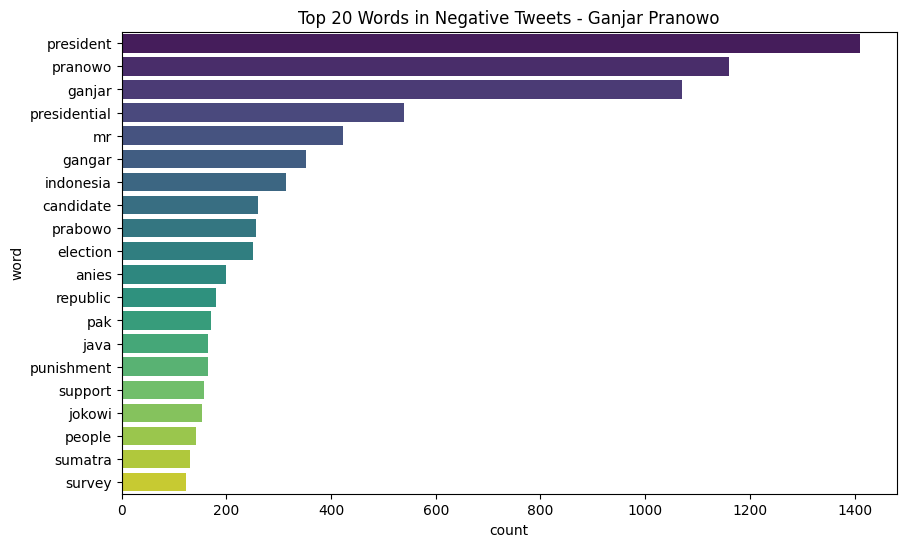

In [ ]:
def plot_word_frequencies(data, label, candidate, top_n=20):
    subset = data[(data['label'] == label) & (data['Candidate'] == candidate)]
    if subset.empty:
        print(f"No data available for {candidate} - {label}")
        return

    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    counts = vectorizer.fit_transform(subset['Text'])
    word_freq = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'count': counts.toarray().sum(axis=0)
    }).sort_values('count', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=word_freq, x='count', y='word', palette="viridis")
    plt.title(f"Top {top_n} Words in {label} Tweets - {candidate}")
    plt.show()

# Iterasi melalui setiap kandidat dan sentimen
candidates = df['Candidate'].unique()
sentiments = df['label'].unique()

for candidate in candidates:
    for sentiment in sentiments:
        plot_word_frequencies(df, sentiment, candidate)

Grafik di atas menunjukkan jumlah 20 kata paling sering muncul pada tweets positif dan tweets negatif pada tiap masing-masing kandidat.

#### WordCloud

WordCloud digunakan untuk menampilkan representasi visual dari kata-kata yang sering muncul.

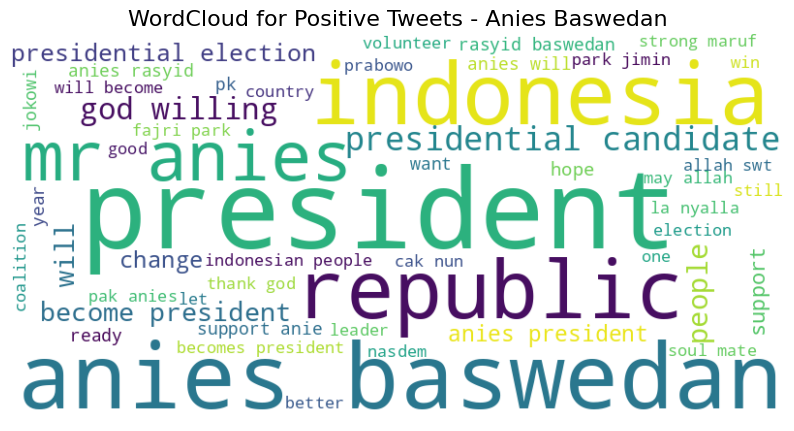

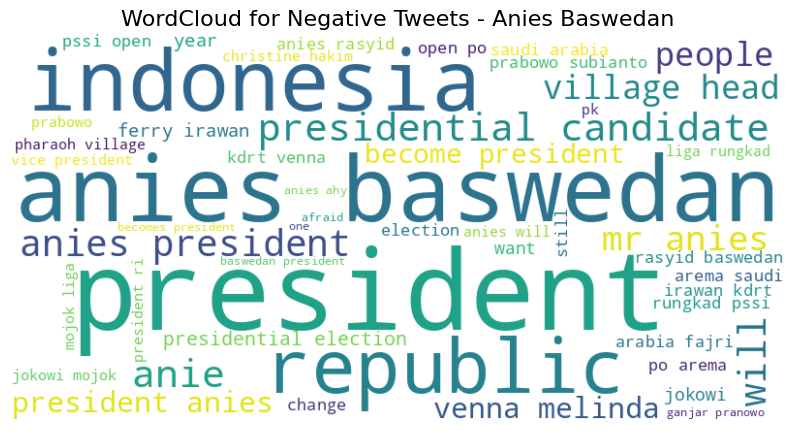

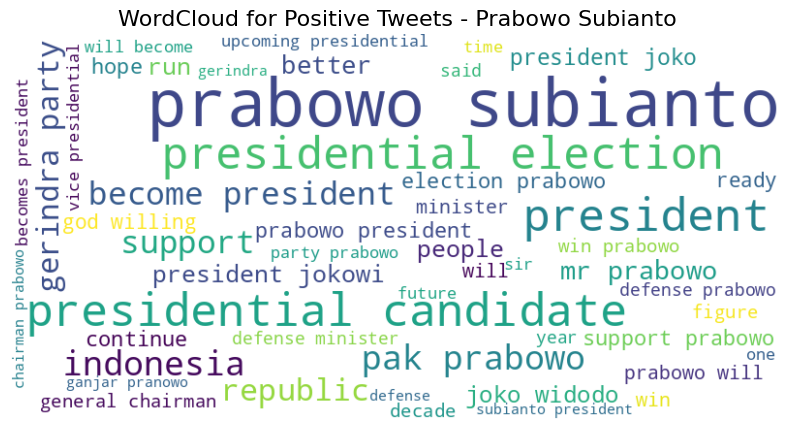

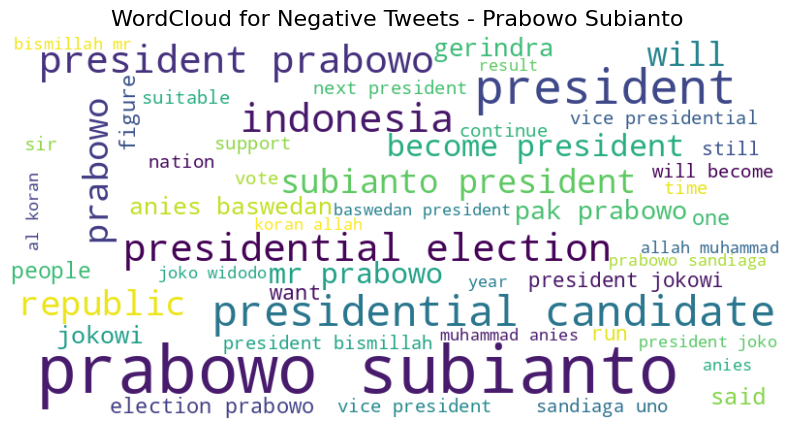

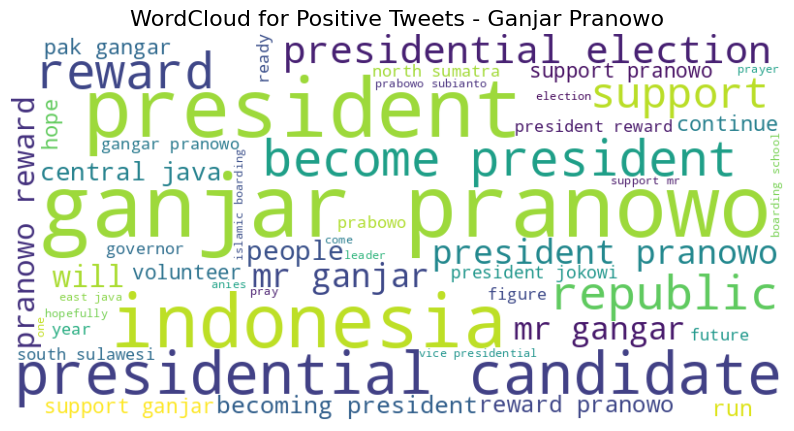

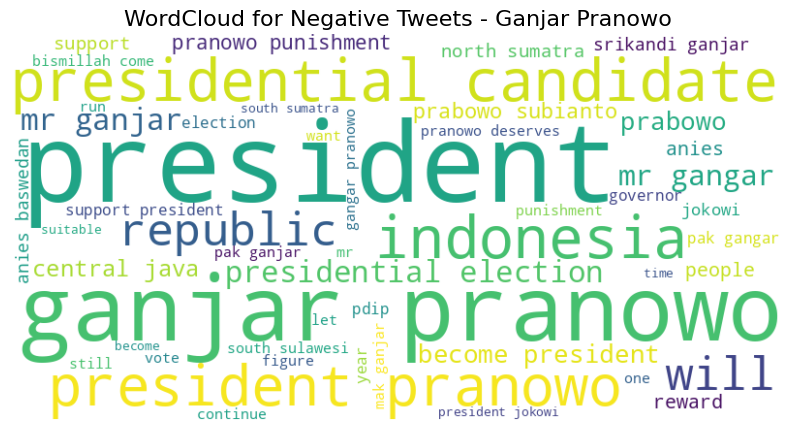

In [ ]:
def plot_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Buat WordCloud per kandidat dan sentimen
candidates = df['Candidate'].unique()
sentiments = df['label'].unique()

for candidate in candidates:
    for sentiment in sentiments:
        subset = df[(df['Candidate'] == candidate) & (df['label'] == sentiment)]
        title = f"WordCloud for {sentiment} Tweets - {candidate}"
        plot_wordcloud(subset['Text'], title)
        print()

WordCloud berisi kata dengan ukuran yang sesuai dengan frekuensi kemunculannya untuk negatif tweets dan untuk positif tweets setiap masing-masing kandidat.

#### Analisis Kata dengan Batasan

Kode ini mencari dan menghitung kata-kata spesifik (seperti slang) dalam dataset.

In [ ]:
def cari_dan_hitung_kata_dengan_batasan(df, daftar_kata):
    def temukan_kata(text, daftar_kata):
        kata_ditemukan = []
        for kata in daftar_kata:
            pola = r'\b' + re.escape(kata) + r'\b'
            if re.search(pola, str(text), re.IGNORECASE):
                kata_ditemukan.append(kata)
        return kata_ditemukan

    # Flatten list of lists dari semua baris
    all_words = [word for sublist in df['Text'].apply(lambda x: temukan_kata(x, daftar_kata)) for word in sublist]

    # Hitung kemunculan setiap kata
    word_counts = Counter(all_words)

    return word_counts

#
daftar_kata_slang = ['mr', 'dude', 'gue', 'gw', 'kece', 'anjay', 'anjir', 'banget', 'wkwk', 'cuek', 'mager', 'alay', 'gokil', 'kepo', 'jamet', 'pede', 'lebay', 'santai', 'gebuk', 'nongki', 'sok', 'bokap', 'nyokap', 'gila', 'kampret', 'ngeselin', 'baper', 'galau', 'KD', 'bucin', 'nangis', 'coi', 'yaudah', 'nih', 'sih', 'doang', 'ciye', 'woy', 'ngehe', 'u', 'r', 'idk', 'brb', 'smh', 'lol', 'omg', 'btw', 'fyi', 'thx', 'pls', 'plz', 'wtf', 'stfu', 'rofl', 'afk', 'asap', 'rn', 'imo', 'tbh', 'ikr', 'ngl', 'jk', 'yolo', 'ftw', 'tbf', 'yeet', 'sus', 'slay', 'stan', 'ghosting', 'simp', 'cap', 'cringe', 'lit', 'lowkey', 'highkey', 'gpp', 'bgt', 'kk', 'lu', 'bro', 'gw', 'deh', 'gt', 'yg', 'hrs', 'skrg', 'bwt', 'utk', 'dgn', 'w', 'y', 'k', 'ga', 'gk', 'emang', 'lah', 'kan', 'weh', 'gitu', 'oke', 'bro', 'coy', 'mantap', 'sumpah', 'asli', 'kawan', 'bang', 'bosque', 'udah', 'gede', 'bgt', 'jiwa', 'cekrek', 'hehe', 'huhu', 'rese', 'cemeng', 'gasken', 'puyeng', 'bokis', 'cazang', 'njir', 'mampus', 'biadab', 'goblok', 'tolol', 'sinting', 'brengsek', 'tai', 'goblog', 'yak', 'keren', 'deh', 'dong', 'kali', 'nya', 'tuh', 'baru', 'abis', 'buat', 'sama', 'duit', 'maap', 'makasih', 'oke', 'sip', 'wkw', 'mksdnya', 'cuman', 'kyknya', 'mungkin', 'soale', 'pdkt', 'cwk', 'cwk', 'jomblo', 'wibu', 'swag', 'yo', 'bruh', 'fam', 'deadass', 'lit', 'salty', 'oof', 'rip', 'legit', 'noob', 'hmm', 'meh', 'omw', 'rn', 'high-key', 'sis', 'fomo', 'yada', 'waduh', 'astaga', 'gak nyangka', 'ya elah', 'bete', 'sebel', 'mumet', 'anjrit', 'yahaha', 'wkwkwk', 'btw aja', 'yaelah', 'astagfirullah', 'subhanallah', 'masyaallah', 'guys', 'sis', 'bestie', 'mhm', 'hmph', 'uwu', 'owo', 'nye', 'trs', 'bru', 'ajg', 'anj', 'asu', 'jir', 'bego', 'deh', 'bener', 'ya ampun', 'aduh', 'woi', 'lu']
hasil_hitung = cari_dan_hitung_kata_dengan_batasan(df, daftar_kata_slang)

# Tampilkan hasil
for i, (kata, jumlah) in enumerate(hasil_hitung.items(), 1):
    print(f"'{kata}'", end='\t' if i % 10 != 0 else '\n')
print()

'mr'	'bang'	'guys'	'bro'	'jk'	'lol'	'sama'	'btw'	'hehe'	'astagfirullah'
'masyaallah'	'goblog'	'yo'	'gt'	'subhanallah'	'sis'	'sip'	'mumet'	'ngehe'	'lah'
'r'	'kk'	'cap'	'coy'	'nya'	'nye'	'pls'	'gede'	'weh'	'ngl'
'hmm'	'meh'	'bestie'	'lu'	'fyi'	'ga'	'kali'	'nih'	'gk'	'tbh'
'anjay'	'kampret'	'rip'	'dude'	'trs'	'gokil'	'gpp'	'fomo'	'gue'	'yak'
'dong'	'asli'	'baru'	'omg'	'tai'	'deh'	'baper'	'njir'	'kece'	


Mencari dan menghitung kata-kata spesifik seperti slang yang sudah ditetapkan sebagai acuan untuk preprocessing text.

## **8. Data Processing and Preprocessing Pipeline**

Pada bagian ini, kita akan memproses data teks mentah agar siap digunakan untuk analisis lebih lanjut. Langkah-langkah yang dilakukan mencakup pembersihan teks, normalisasi kata slang, penghapusan stopwords, tokenisasi, dan lemmatization. Proses ini dirancang untuk meningkatkan kualitas data dan memastikan analisis berjalan dengan baik.

In [ ]:
## Import library yang dibutuhkan kembali
from cleantext import clean
import spacy
import emoji

Kita menggunakan beberapa pustaka seperti **clean-text**, **spacy**, dan **emoji** untuk membersihkan data teks, serta pustaka lainnya untuk langkah preprocessing lanjutan.

### 8.1 Pembersihan Teks dengan `cleantext`

Kode di bawah ini menggunakan pustaka `cleantext` untuk membersihkan teks dari elemen-elemen yang tidak relevan seperti URL, email, nomor telepon, tanda baca, dan emoji.

In [ ]:
def preprocess_text_with_cleantext(text):
    return clean(
        text,
        lower=True,                   # Konversi ke huruf kecil
        no_line_breaks=True,          # Hapus \n dan \r
        no_urls=True,                 # Hapus URL
        no_emails=True,               # Hapus email
        no_phone_numbers=True,        # Hapus nomor telepon
        no_numbers=False,             # Tidak hapus angka (opsional)
        no_punct=True,                # Hapus tanda baca
        no_emoji=True,                # Hapus emoji
        replace_with_punct="",        # Tidak ganti tanda baca
        replace_with_url="",          # Ganti URL dengan string kosong
        replace_with_email="",        # Ganti email dengan string kosong
    )

### 8.2 Penggunaan `spaCy` untuk Tokenisasi dan Lemmatization

`spaCy` digunakan untuk tokenisasi, penghapusan stopwords, dan lemmatization untuk mendapatkan bentuk dasar dari kata-kata dalam teks.

In [ ]:
nlp = spacy.load("en_core_web_sm")  # Model bahasa Inggris
def preprocess_with_spacy(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_  # Lemmatization untuk mendapatkan kata dasar
        for token in doc
        if not token.is_stop         # Hapus stopword
        and not token.is_punct       # Hapus tanda baca
        and not token.is_space       # Hapus spasi tambahan
        and not token.like_url       # Hapus URL
        and not token.like_email     # Hapus email
    ]
    return " ".join(tokens)

### 8.3 Penghapusan Emoji

Untuk memastikan teks bebas dari karakter emoji, kita menggunakan pustaka `emoji`.

In [ ]:
def remove_emoji(text):
    return emoji.replace_emoji(text, replace="")

### 8.4 Normalisasi Kata Slang

Langkah ini menggunakan kamus `slang_dict` untuk mengganti kata-kata slang dengan padanan resminya.

In [ ]:
slang_dict = {
    "mr": "mister",
    "bang": "brother",
    "guys": "friends",
    "bro": "brother",
    "jk": "just kidding",
    "lol": "laughing out loud",
    "sama": "",
    "btw": "by the way",
    "hehe": "",
    "astagfirullah": "",
    "based": "",
    "masyaallah": "",
    "goblog": "",
    "yo": "hey",
    "gt": "got to",
    "subhanallah": "",
    "sis": "sister",
    "sip": "okay",
    "mumet": "",
    "ngehe": "",
    "lah": "",
    "r": "are",
    "kk": "sister",
    "cap": "",
    "coy": "",
    "nya": "",
    "nye": "",
    "pls": "please",
    "gede": "big",
    "weh": "",
    "ngl": "not gonna lie",
    "hmm": "",
    "meh": "",
    "bestie": "best friend",
    "lu": "you",
    "fyi": "for your information",
    "ga": "not",
    "kali": "maybe",
    "nih": "",
    "gk": "not",
    "tbh": "to be honest",
    "anjay": "",
    "kampret": "",
    "rip": "rest in peace",
    "dude": "man",
    "trs": "then",
    "gokil": "",
    "gpp": "no problem",
    "fomo": "fear of missing out",
    "gue": "i",
    "yak": "",
    "dong": "",
    "asli": "really",
    "baru": "new",
    "omg": "oh my god",
    "tai": "",
    "deh": "",
    "baper": "",
    "njir": "",
    "kece": "cool"
}

In [ ]:
def normalize_slang(text):
    return " ".join([slang_dict.get(word, word) for word in text.split()])

### 8.5 Pipeline Preprocessing Lengkap

Semua langkah di atas digabungkan dalam sebuah fungsi pipeline yang lengkap.

In [ ]:
def full_preprocessing_pipeline(text):
    # Langkah 1: Clean text menggunakan cleantext
    text = preprocess_text_with_cleantext(text)
    # Langkah 2: Hapus emoji
    text = remove_emoji(text)
    # Langkah 3: Normalisasi slang
    text = normalize_slang(text)
    # Langkah 4: Tokenisasi, penghapusan stopwords, dan lemmatization
    text = preprocess_with_spacy(text)
    return text

#### Aplikasi Pipeline pada Dataset

In [ ]:
df['clean_text'] = df['Text'].apply(full_preprocessing_pipeline)

## **9. Exploratory Data Analysis (EDA) After Preprocessing**

Tahapan ini digunakan untuk melihat sekilas bagaimana bentuk data setelah melalui proses preprocessing. Informasi ini penting untuk memastikan bahwa preprocessing berjalan dengan benar, seperti penghapusan emoji, normalisasi slang, dan tokenisasi berhasil diterapkan.

### 9.1 Data Preview

In [ ]:
# Menampilkan 5 baris pertama dari data yang telah diproses
df.head()

Tweet Count                                               Text     label  \
0            22                               anies president info  Positive   
1         30121  gerindra party politician sandiaga uno answers...  Positive   
2           230  mr. anies continued, we will guard him until h...  Positive   
3          2670  may allah swt save the nation and state of the...  Positive   
4           766  poor chotimah, uncle anies, that's why my fami...  Positive   

        Candidate                      Date  Tweet Length  \
0  Anies Baswedan 2023-04-16 10:04:35+00:00             3   
1  Anies Baswedan 2023-04-16 10:00:01+00:00            24   
2  Anies Baswedan 2023-04-16 09:14:46+00:00            11   
3  Anies Baswedan 2023-04-16 07:03:05+00:00            51   
4  Anies Baswedan 2023-04-16 06:03:59+00:00            16   

                                          clean_text  
0                                anie president info  
1  gerindra party politician sandiaga uno answer ...  
2               mister anie continue guard president  
3  allah swt save nation state republic indonesia...  
4  poor chotimah uncle anie s family decide elect...

Menampilkan data baru setelah melewati preprocessing dan hasilnya tersimpan pada kolom clean_text.


### 9.2 Visualisasi Frekuensi Kata Setelah Preprocessing

#### Frekuensi Kata untuk Setiap Kandidat dan Sentimen

Menghasilkan grafik batang untuk frekuensi kata berdasarkan kandidat dan sentimen. Tujuannya untuk mengidentifikasi kata-kata yang paling sering muncul dalam tweet yang telah diproses, berdasarkan kategori kandidat dan sentimen.

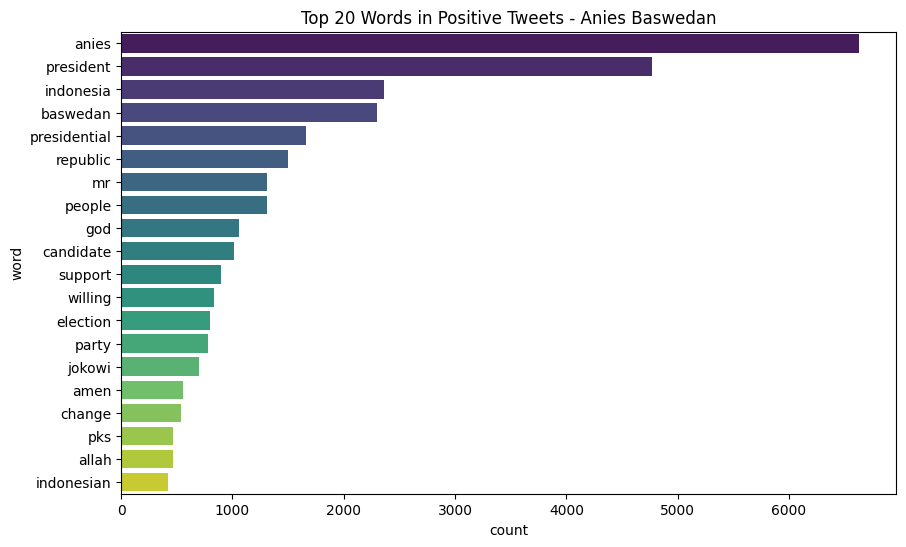

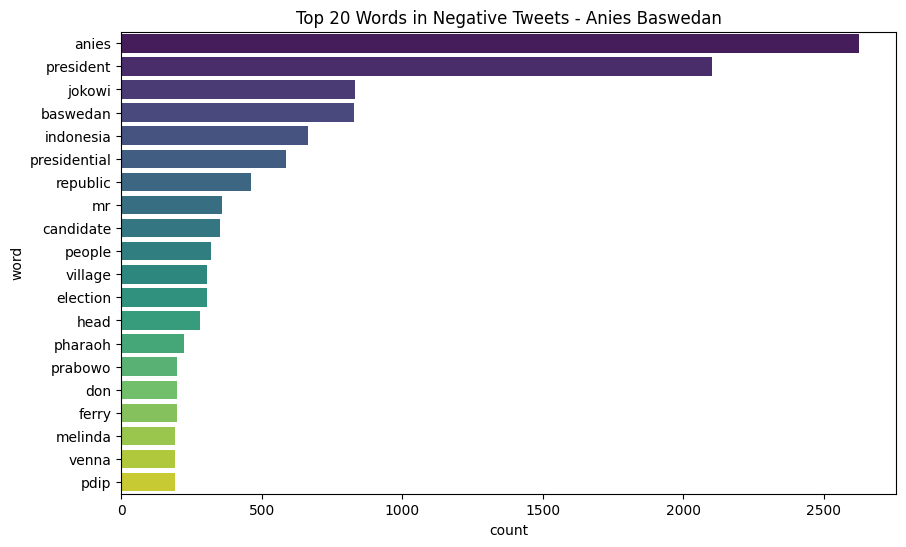

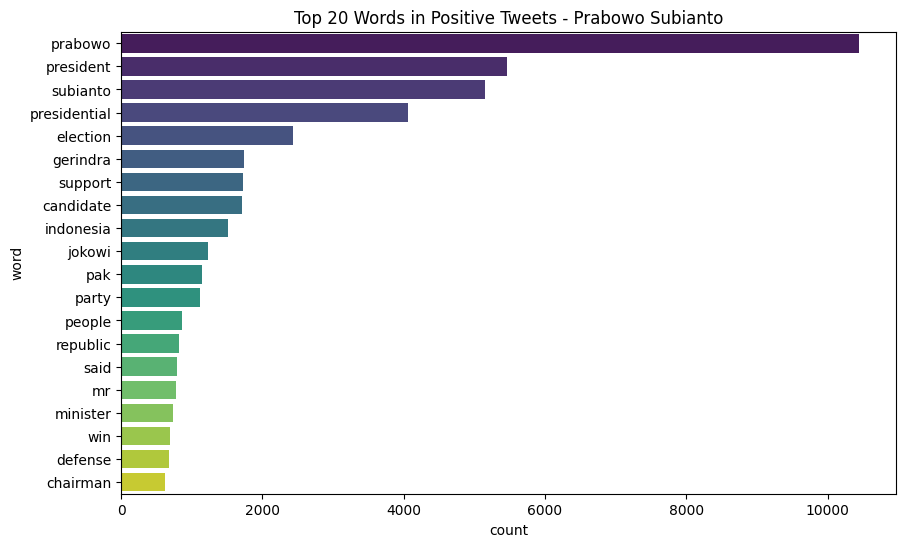

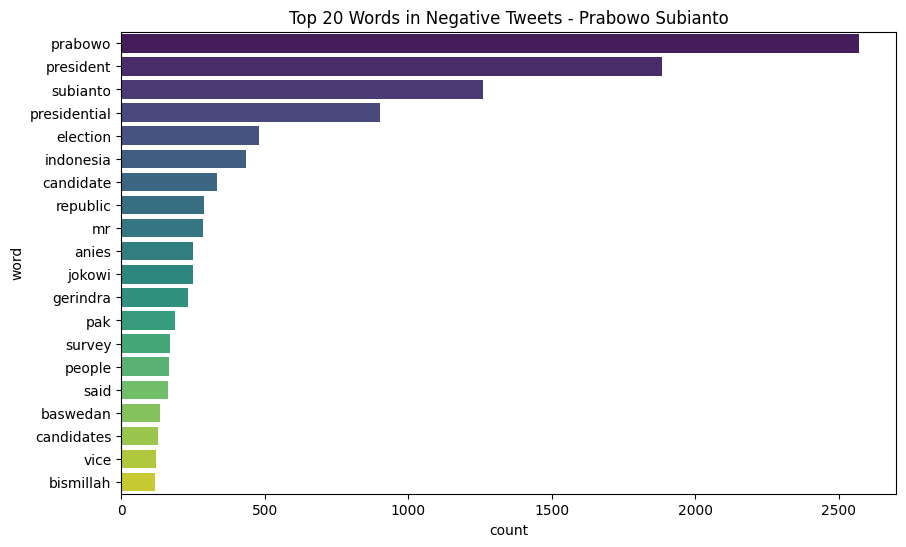

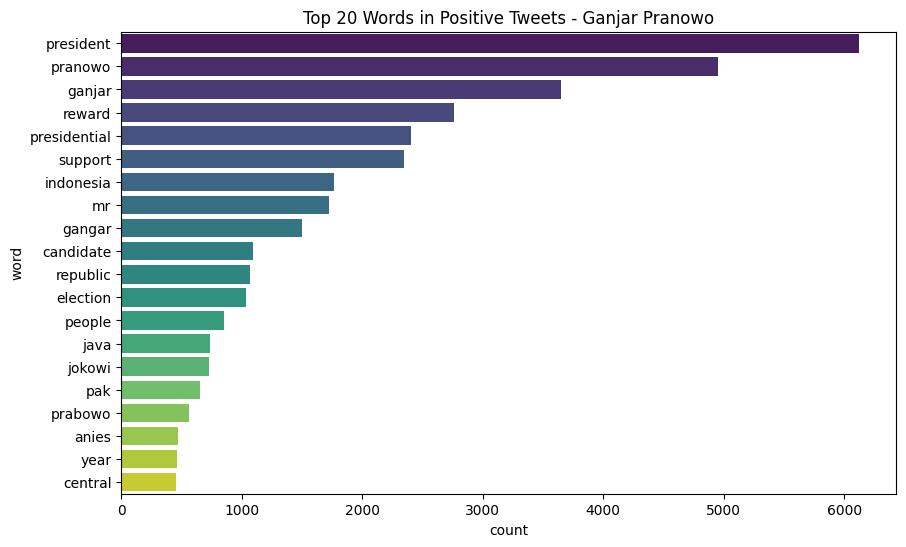

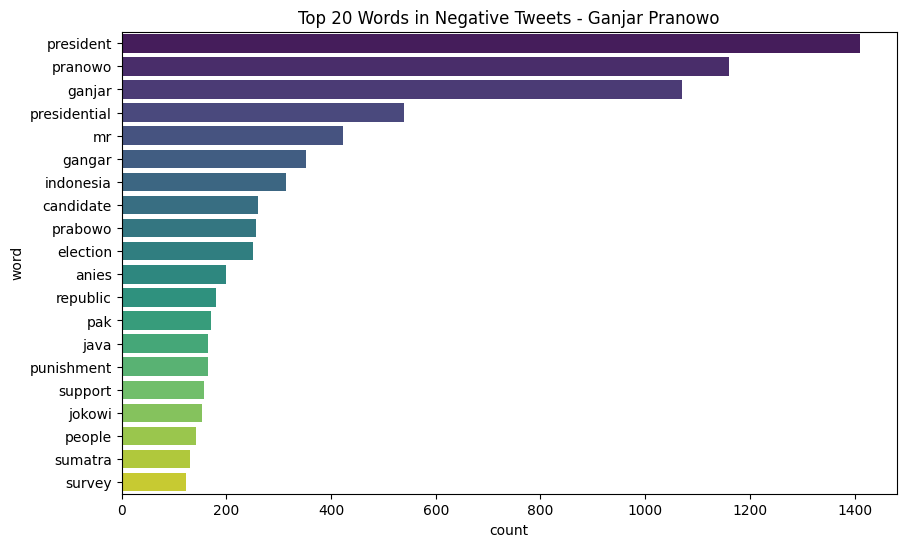

In [ ]:
for candidate in candidates:
    for sentiment in sentiments:
        plot_word_frequencies(df, sentiment, candidate)

#### Visualisasi WordCloud untuk Setiap Kandidat dan Sentimen

Menghasilkan WordCloud untuk setiap kombinasi kandidat dan sentimen. Tujuannya untuk memberikan gambaran visual tentang kata-kata yang paling dominan dalam tweet berdasarkan kandidat dan sentimen.

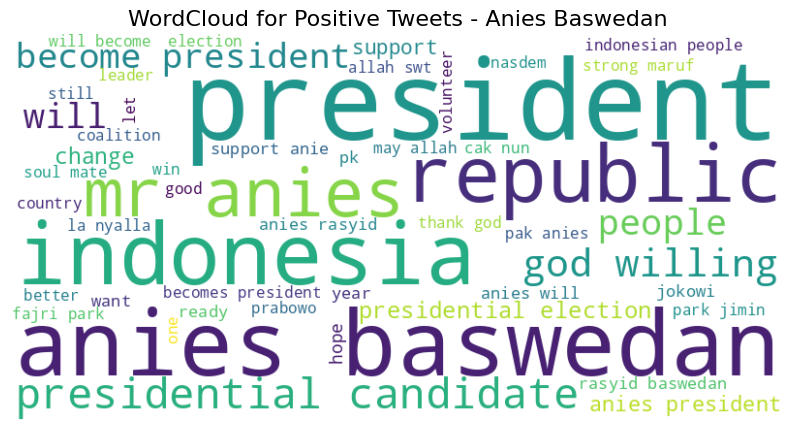

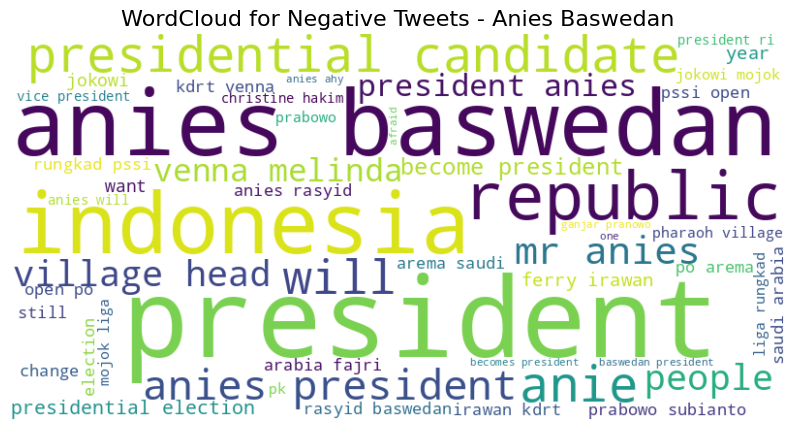

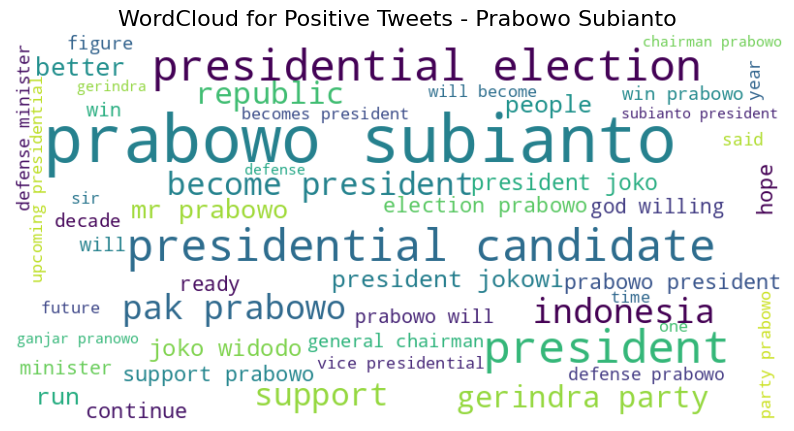

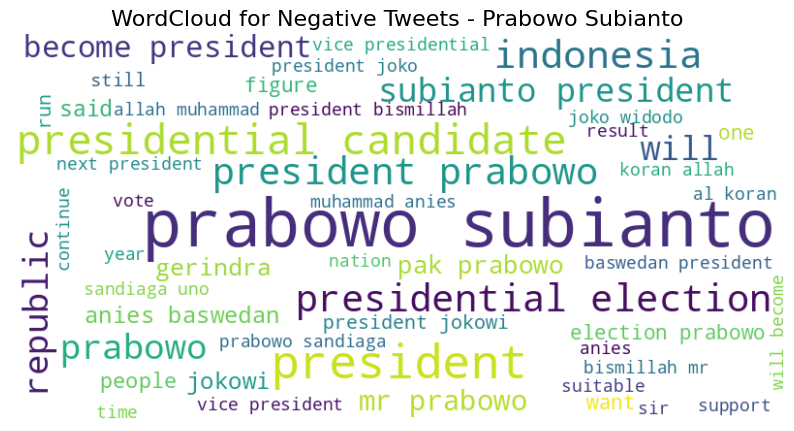

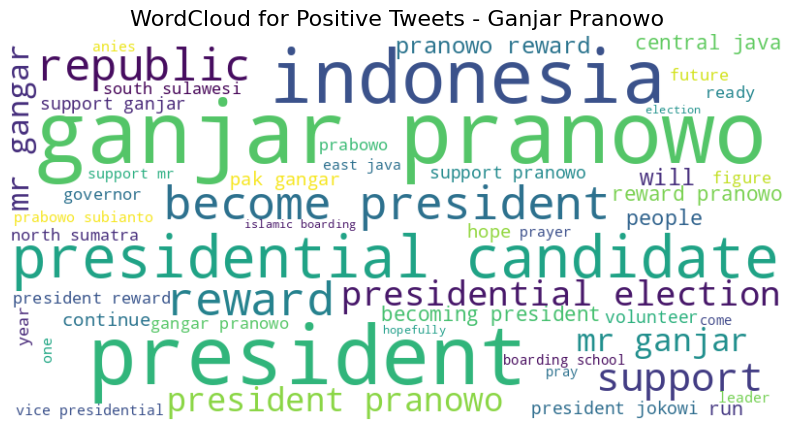

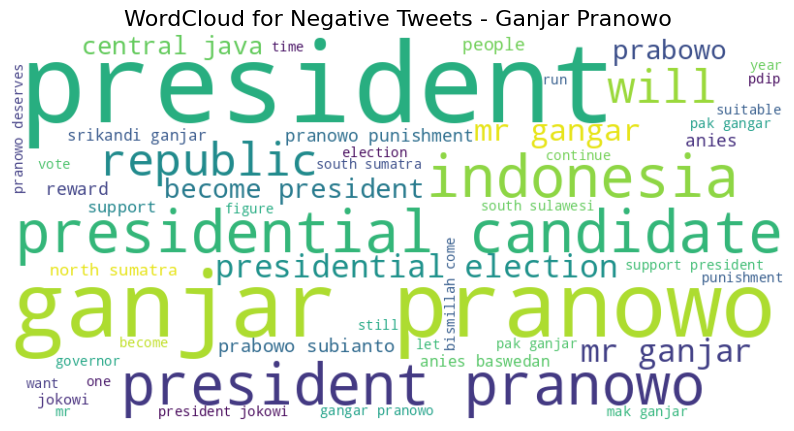

In [ ]:
for candidate in candidates:
    for sentiment in sentiments:
        subset = df[(df['Candidate'] == candidate) & (df['label'] == sentiment)]
        title = f"WordCloud for {sentiment} Tweets - {candidate}"
        plot_wordcloud(subset['Text'], title)
        print()

Hasil eksplorasi data (EDA) setelah preprocessing, khususnya pada analisis frekuensi kata-kata dan WordCloud, menunjukkan pola yang konsisten. Setelah preprocessing, kata-kata yang lebih relevan dan sering digunakan dalam diskusi publik tentang kandidat dan topik politik akan lebih terlihat.

Meskipun proses WordCloud dan analisis frekuensi kata menggunakan pendekatan yang sedikit berbeda dalam representasi visual atau tabular, keduanya pada dasarnya menggambarkan tema yang sama. Kata-kata yang sering muncul (seperti nama kandidat, isu politik, atau opini) menjadi lebih terlihat setelah langkah-langkah pembersihan dan normalisasi diterapkan.


## **10. Data Sampling & Post-Prepocessing**

### 10.1 Exploratory Analysis of Label Distribution

Pada tahap ini, kita menganalisis distribusi label sentimen (`Positive` dan `Negative`). Informasi ini penting untuk memahami keseimbangan dataset dan menentukan strategi penyeimbangan data yang diperlukan.

In [ ]:
# Mengecek distribusi awal label sentimen
df['label'].value_counts()

label
Positive    21654
Negative     8074
Name: count, dtype: int64

Hasil dari pengecekan distribusi label sentimen menunjukkan bahwa dataset memiliki ketidakseimbangan antara jumlah tweet yang berlabel "Positive" dan "Negative".

### 10.2 Label Mapping: Converting Labels to Binary Format

Label `Positive` diubah menjadi `1` dan `Negative` menjadi `0` untuk mempermudah proses pemodelan. Pendekatan biner ini diperlukan untuk algoritma pembelajaran mesin yang membutuhkan representasi numerik.

In [ ]:
print("Sebelum Mapping:")
print(df['label'].head())

Sebelum Mapping:
0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: label, dtype: object


In [ ]:
# Mengonversi label 'Positive' menjadi 1 dan 'Negative' menjadi 0
df['label'] = df['label'].map({'Positive':1, 'Negative':0})

In [ ]:
print("Setelah Mapping:")
print(df['label'].head())

Setelah Mapping:
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


Sebelum mapping label sentimen pada kolom label awalnya berisi nilai string, yaitu 'Positive' dan 'Negative'. Fungsi map() digunakan untuk mengganti nilai-nilai dalam kolom dengan pasangan yang sudah ditentukan, yaitu {'Positive': 1, 'Negative': 0}

### 10.3 Addressing Class Imbalance with Oversampling

- **Identifikasi Ketidakseimbangan Data**

In [ ]:
# Mengecek kembali distribusi label setelah mapping
print(df['label'].value_counts())

label
1    21654
0     8074
Name: count, dtype: int64


Distribusi label yang tidak seimbang dapat menyebabkan model bias terhadap kelas mayoritas. Untuk mengatasi ini, kita akan menggunakan teknik **Random Oversampling**.

- **Oversampling dengan RandomOverSampler**

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Oversampling data
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['clean_text']).reshape(-1, 1), np.array(df['label']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['clean_text', 'label']);

In [ ]:
# Mengecek distribusi label setelah oversampling
print(train_os['label'].value_counts())

label
1    21654
0    21654
Name: count, dtype: int64


Proses yang dilakukan dalam kode tersebut adalah oversampling menggunakan teknik RandomOverSampler untuk menangani masalah ketidakseimbangan kelas dalam dataset. Teknik ini bertujuan untuk menambah jumlah data pada kelas minoritas (dalam hal ini kelas Negative/0) dengan cara menggandakan sampel yang ada hingga jumlahnya setara dengan kelas mayoritas (kelas Positive/1).

Random oversampling menambahkan salinan dari sampel kelas minoritas hingga distribusinya seimbang dengan kelas mayoritas. Dataset hasil oversampling disimpan dalam variabel `train_os`.

### 10.4 Splitting Dataset: Train, Validation, and Test Sets

- **Membagi Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Memisahkan data menjadi train, validation, dan test set
X = train_os.drop(columns=['label']).values
y = train_os['label'].values

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Dataset dibagi menjadi:
- **Training Set (60%)**: Untuk melatih model.
- **Validation Set (20%)**: Untuk menyetel hyperparameter model.
- **Test Set (20%)**: Untuk mengevaluasi performa akhir model.

- **One-Hot Encoding Labels**

In [ ]:
# Menyimpan salinan label untuk referensi di masa mendatang
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [ ]:
# One-Hot Encoding label
from sklearn.preprocessing import OneHotEncoder
ohe = preprocessing.OneHotEncoder()

y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test= ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

One-hot encoding mengubah label biner menjadi format vektor untuk meningkatkan kompatibilitas dengan beberapa algoritma pembelajaran mesin dan deep learning.

### 10.5 Final Dataset Summary

In [ ]:
# Melihat ringkasan jumlah data di setiap set
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 25984
VALIDATION DATA: 8662
TESTING DATA: 8662


Hasil akhir dari pembagian dataset adalah:
- **Training Data**: 25984 sampel
- **Validation Data**: 8662 sampel
- **Testing Data**: 8662 sampel

Setiap set digunakan untuk keperluan yang berbeda seperti pelatihan, validasi, dan evaluasi.

## **11. Modelling dan Model Evaluation**

### **11.1 Sentiment Analysis Using Baseline Model: Naive Bayes**

Sebelum menerapkan model kompleks seperti BERT, kita akan membangun model baseline sederhana untuk klasifikasi sentimen menggunakan **Naive Bayes Classifier**. Model ini akan membantu kita memahami performa awal pada dataset yang telah diproses. Baseline ini juga dapat menjadi tolok ukur untuk membandingkan performa dengan model yang lebih canggih nantinya.

- **Tokenisasi dengan CountVectorizer**

Sebelum melatih model, kita perlu mengubah teks menjadi representasi numerik menggunakan **CountVectorizer**.

In [ ]:
# Mengimpor pustaka yang diperlukan
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Metrik Evaluasi
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Tokenisasi teks
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train.ravel().astype(str)) # Convert elements to strings before fitting
X_test_cv = clf.transform(X_test.ravel().astype(str)) # Convert elements to strings before transforming

- **Mengonversi Tokenisasi ke TF-IDF**

Setelah tokenisasi, kita akan menerapkan **TF-IDF Transformer** untuk memberikan bobot pada kata berdasarkan frekuensi dalam dokumen.

In [ ]:
# Mengonversi ke TF-IDF
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

- **Melatih Model Naive Bayes**

Kita mendefinisikan dan melatih **Multinomial Naive Bayes Classifier** untuk klasifikasi sentimen.

In [ ]:
# Melatih model Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)

MultinomialNB()

- **Memprediksi dan Menghitung Probabilitas**

Setelah pelatihan, kita menggunakan model untuk membuat prediksi pada data uji dan menghitung probabilitas kelas.

In [ ]:
# Prediksi dan probabilitas
nb_pred = nb_clf.predict(X_test_tf)
nb_probs = nb_clf.predict_proba(X_test_tf)[:, 1]

### **11.2 Evaluasi Model Naive Bayes**

- **Definisi Evaluator**

Kita menggunakan evaluator yang berisi beberapa fungsi untuk menganalisis dan memvisualisasikan performa model.

In [ ]:
class BinaryClassificationEvaluator:
    def __init__(self, model_name="Model"):
        """Initialize evaluator with model name for plot titles."""
        self.model_name = model_name
        plt.style.use('seaborn-v0_8-whitegrid')

    def plot_training_history(self, history):
        """Plot training & validation loss/accuracy curves."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Loss plot
        ax1.plot(history['loss'], 'b-', label='Training Loss', linewidth=2)
        ax1.plot(history['val_loss'], 'r--', label='Validation Loss', linewidth=2)
        ax1.set_title(f'{self.model_name}: Training and Validation Loss', pad=15)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Accuracy plot
        ax2.plot(history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
        ax2.plot(history['val_accuracy'], 'r--', label='Validation Accuracy', linewidth=2)
        ax2.set_title(f'{self.model_name}: Training and Validation Accuracy', pad=15)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        """Plot confusion matrix heatmap."""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Negative', 'Positive'],
                   yticklabels=['Negative', 'Positive'])

        plt.title(f'{self.model_name}: Confusion Matrix', pad=15)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Print classification metrics
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))

    def plot_roc_curve(self, y_true, y_pred_proba):
        """Plot ROC curve."""
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.title(f'{self.model_name}: Receiver Operating Characteristic', pad=15)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_precision_recall_curve(self, y_true, y_pred_proba):
        """Plot Precision-Recall curve."""
        precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
        avg_precision = average_precision_score(y_true, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='darkorange', lw=2,
                label=f'PR curve (AP = {avg_precision:.2f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.title(f'{self.model_name}: Precision-Recall Curve', pad=15)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="lower left")
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_misclassifications(self, y_true, y_pred, X_test, max_samples=5):
        """Analyze and visualize misclassified samples."""
        misclassified_idx = np.where(y_true != y_pred)[0]

        print(f"\nTotal misclassified samples: {len(misclassified_idx)}")
        print(f"\nMisclassification rate: {(len(misclassified_idx)/len(y_true))*100:.2f}%")

        if len(misclassified_idx) > 0:
            print("\nSample misclassified instances:")
            for idx in misclassified_idx[:max_samples]:
                print(f"\nText: {X_test[idx]}")
                print(f"True label: {y_true[idx]}")
                print(f"Predicted label: {y_pred[idx]}")

        # Plot distribution of misclassifications
        plt.figure(figsize=(8, 6))
        sns.countplot(y=y_true[misclassified_idx])
        plt.title(f'{self.model_name}: Distribution of Misclassified Samples', pad=15)
        plt.xlabel('Count')
        plt.ylabel('True Label')
        plt.show()

In [ ]:
# Inisialisasi evaluator
nb_evaluator = BinaryClassificationEvaluator("Naive Bayes")

#### **Confusion Matrix dan Classification Report**

**Confusion Matrix** memberikan gambaran detail tentang distribusi prediksi model. Matriks ini membantu untuk:
- Mengetahui jumlah prediksi benar (True Positives dan True Negatives).
- Mengidentifikasi jumlah kesalahan prediksi (False Positives dan False Negatives).

**Classification Report** mencakup metrik penting seperti:
- Precision: Proporsi prediksi benar terhadap semua prediksi positif.
- Recall: Proporsi prediksi benar terhadap semua sampel positif yang sebenarnya.
- F1-Score: Harmoni antara precision dan recall.

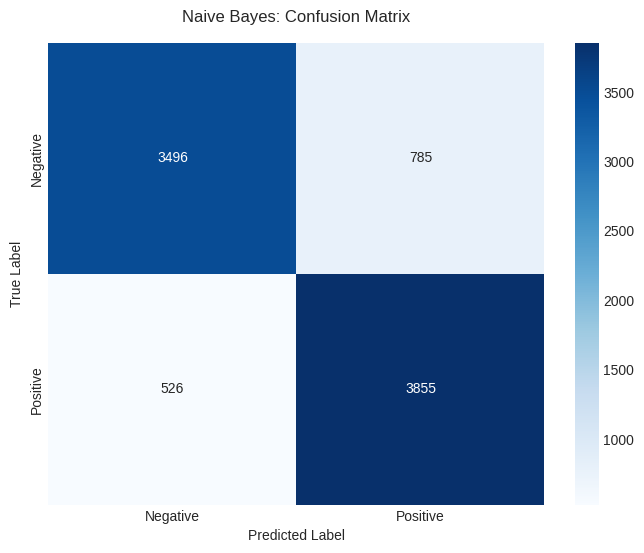


Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.82      0.84      4281
    Positive       0.83      0.88      0.85      4381

    accuracy                           0.85      8662
   macro avg       0.85      0.85      0.85      8662
weighted avg       0.85      0.85      0.85      8662



In [ ]:
# Plot confusion matrix
nb_evaluator.plot_confusion_matrix(y_test_le, nb_pred)

Pada hasil visualisasi di atas, dapat dinilai bahwa distribusi prediksi model sudah bisa dikatakan baik. Hasil prediksi true memiliki akurasi yang cukup baik, dengan 3855 prediksi positif yang benar dan 3496 prediksi negatif yang benar. Meskipun demikian, model juga menghasilkan cukup banyak false positive (785) dan false negative (526 yang menunjukkan bahwa model masih memiliki ruang untuk peningkatan. Perbandingan rasio false positive dan false negative perlu dipertimbangkan, karena hal ini akan berdampak langsung pada metrik evaluasi model lainnya, seperti precision, recall, dan F1-score.

Dari hasil laporan di atas dapat disimpulkan bahwa nilai akurasi model naive bayes sudah cukup baik yakni mencapai nilai 0.85 atau 85% pada akurasinya. Nilai presisi / ketepatan sampel juga sudah cukup baik yakni 87% pada negatif dan 83% pada positif yang dilanjutkan dengan recall yang juga sudah cukup baik pada kedua model. Sehingga F1-score menunjukkan bahwa kedua sampel sudah cukup baik di angka 84% dan 85% namun masih terbuka pada peningkatan.

#### **Plot ROC Curve**

ROC (Receiver Operating Characteristic) Curve menunjukkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)** pada berbagai ambang batas probabilitas. Area di bawah kurva (AUC) adalah indikator seberapa baik model membedakan antara kelas.

Keunggulan dari analisis ini:
- Menggambarkan performa model secara menyeluruh pada berbagai ambang batas probabilitas.
- AUC tinggi menunjukkan kemampuan model untuk memprediksi dengan baik, bahkan pada dataset yang tidak seimbang.

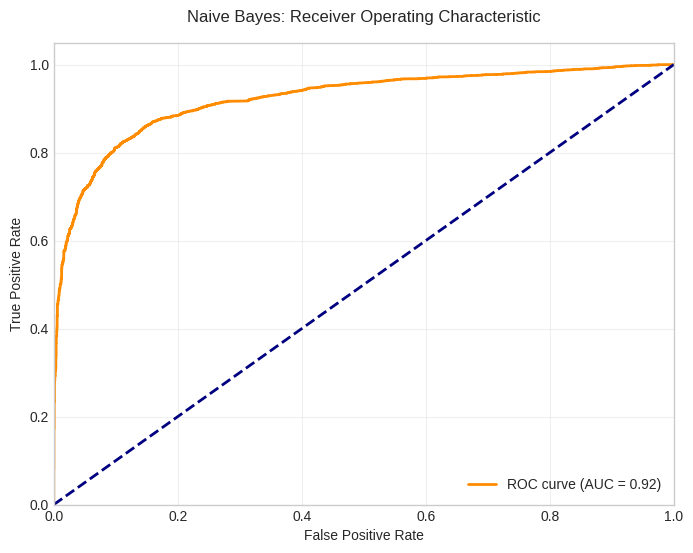

In [ ]:
# Plot ROC curve
nb_evaluator.plot_roc_curve(y_test_le, nb_probs)

Nilai AUC (Area Under the Curve) pada kurva ROC adalah 0.92. Nilai AUC yang mendekati 1 menunjukkan bahwa model memiliki kemampuan klasifikasi yang sangat baik. AUC 0.92 berarti model dapat membedakan dengan sangat baik antara kelas positif dan negatif.

#### **Precision-Recall Curve**

Grafik ini sangat berguna jika dataset memiliki distribusi kelas yang tidak seimbang. Kurva ini menunjukkan hubungan antara **Precision** dan **Recall** pada berbagai ambang batas.

Tujuan:
- Membantu memilih ambang batas probabilitas yang optimal, terutama ketika trade-off antara precision dan recall menjadi penting.
- Area di bawah Precision-Recall Curve juga menjadi indikator performa model.

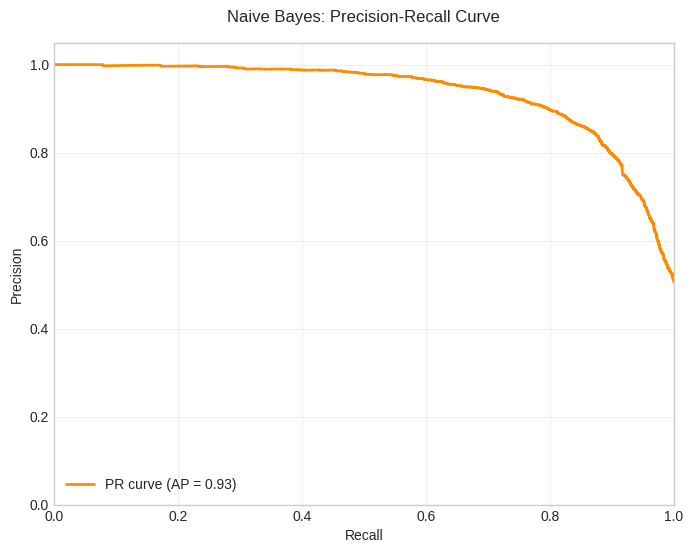

In [ ]:
# Plot Precision-Recall curve
nb_evaluator.plot_precision_recall_curve(y_test_le, nb_probs)

Nilai AP (Average Precision) pada kurva Precision-Recall adalah 0.93. AP yang mendekati 1 mengindikasikan bahwa model memiliki presisi yang sangat tinggi, artinya ketika model memprediksi suatu sampel sebagai positif, maka kemungkinan besar sampel tersebut memang benar-benar positif.

#### **Analisis Misclassifications**

Menampilkan sampel teks yang salah diklasifikasikan oleh model. Analisis ini penting untuk:
- Mengidentifikasi pola kesalahan model, misalnya apakah model kesulitan memahami konteks tertentu.
- Memberikan wawasan tentang langkah-langkah perbaikan, seperti pelatihan ulang pada data yang lebih beragam atau penambahan fitur tambahan.


Total misclassified samples: 1311

Misclassification rate: 15.14%

Sample misclassified instances:

Text: ['continue jokowis program later run elect president republic indonesia prabowo subianto period']
True label: 0
Predicted label: 1

Text: ['mister bowo president republic indonesia']
True label: 0
Predicted label: 1

Text: ['doubt mister ganjar pranowo continue mister jokowis performance 2019 hope mister ganjar pranowo president republic indonesia replace mister jokowi 2018']
True label: 0
Predicted label: 1

Text: ['come try share opinion decade friend']
True label: 0
Predicted label: 1

Text: ['continue mister ganjar pranowo president republic indonesia']
True label: 0
Predicted label: 1


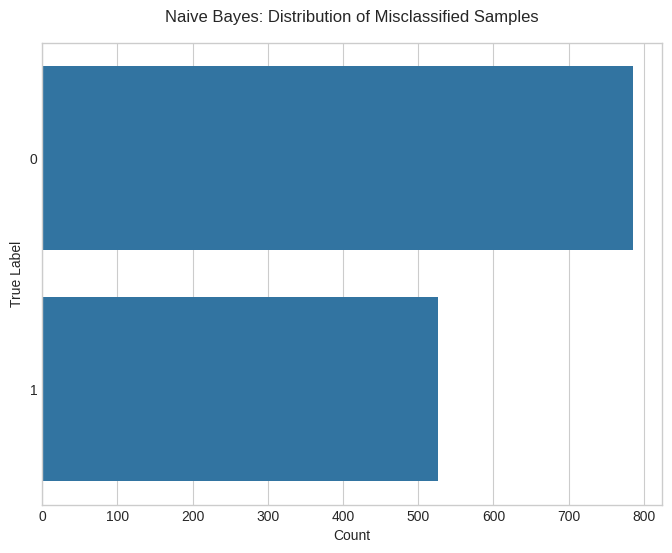

In [ ]:
# Plot misclassifications
nb_evaluator.plot_misclassifications(y_test_le, nb_pred, X_test)

Total sampel yang diklasifikasikan salah mencatat 1311 sampel, di mana tingkat kesalahan klasifikasi ada pada 15.14% keseluruhan data. Sampel yang negatif diklasifikan sebagai 0 dan untuk positif memakai 1. Kesalahan ini bersifat wajar mengingat sentimen analisis mengambil dataset secara general di mana tidak semua perkataan akan mengandung makna yang sama jika dipadankan pada kalimat tertentu.

### **11.3 Hasil Model Naive Bayes**

Model baseline Naive Bayes berhasil mencapai akurasi **85%**, yang menunjukkan bahwa model ini efektif untuk klasifikasi sentimen awal. Namun, ada ruang untuk perbaikan, terutama dalam menangani misclassifications. Pada bagian selanjutnya, kita akan mengimplementasikan model **BERT** untuk meningkatkan akurasi dan generalisasi.

### **11.4 Sentiment Analysis Using BERT**

Pada bagian ini, kita akan menerapkan **Transformers Model**, khususnya **BERT (Bidirectional Encoder Representations from Transformers)**, untuk melakukan klasifikasi sentimen. Model ini dikenal dengan performanya yang unggul dalam memahami konteks dan makna dari teks. Dengan BERT, kita dapat menangani tugas klasifikasi secara lebih efektif dibandingkan model baseline sebelumnya.

- **Import Libraries**

Langkah pertama adalah mengimpor pustaka utama seperti `transformers`, yang menyediakan API untuk model BERT, serta pustaka pendukung lainnya.

In [ ]:
# Transformers
from transformers import BertTokenizerFast, TFBertModel

- **Load Pre-trained Tokenizer**

Kita menggunakan tokenizer BERT-base uncased untuk mengubah teks menjadi token yang sesuai dengan format input BERT.

In [ ]:
# Inisialisasi tokenizer BERT
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

- `BertTokenizerFast`: Menggunakan tokenizer cepat untuk efisiensi.
- `bert-base-uncased`: Model pre-trained yang tidak case-sensitive (huruf besar dan kecil dianggap sama).

- **Define Maximum Sequence Length**

Kita mendefinisikan panjang maksimum token yang dapat diproses oleh model.

In [ ]:
MAX_LEN=128

- **Tokenization Function**

Mendefinisikan fungsi untuk melakukan tokenisasi teks, menambahkan token khusus, memastikan panjang token, dan mengembalikan input berupa `input_ids` dan `attention_mask`.

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        # Ensure data[i] is a string, handle potential nested arrays
        text = data[i][0] if isinstance(data[i], (np.ndarray, list)) and len(data[i]) > 0 else str(data[i])
        encoded = tokenizer.encode_plus(
            text,  # Pass the string to encode_plus
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

- **Tokenize Dataset**

Kita memproses dataset latih, validasi, dan uji untuk menghasilkan token numerik dan attention mask dengan mengaplikasikan fungsi tokenisasi.

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

- **Load Pre-trained BERT Model**

Memuat model BERT-base uncased untuk digunakan sebagai backbone.

In [ ]:
# Inisialisasi model BERT
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

- **Define Model Architecture**

Membangun arsitektur model dengan menambahkan lapisan klasifikasi di atas model BERT.

Arsitektur model melibatkan:
- **Input Layer** untuk token IDs dan attention mask.
- **Pre-Trained BERT Layer** untuk ekstraksi fitur.
- **Dropout Layer** untuk mencegah overfitting.
- **Dense Layer** untuk klasifikasi sentimen.

In [ ]:
def create_model(bert_model, max_len=128):
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    embeddings = bert_model([input_ids, attention_masks])[1]
    dropout = tf.keras.layers.Dropout(0.3)(embeddings)
    output = tf.keras.layers.Dense(2, activation="softmax")(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

- **Initialize and Compile Model**

Membuat model dan menampilkan ringkasan arsitekturnya.

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

**Struktur Model**

1. **Input Layer**
   - Terdapat **dua input layer** (`input_1` dan `input_2`).
   - Dimensi input: `(None, 128)`.
     - **None** berarti jumlah sampel (batch size) dapat bervariasi.
     - **128** menunjukkan panjang maksimum token (maksimal 128 token per input teks setelah tokenisasi).
   - **Input_1** dan **Input_2** kemungkinan merupakan:
     - **Input_1**: Input token IDs (sekuens token teks).
     - **Input_2**: Input attention mask (penanda bagian teks yang relevan, biasanya 1 untuk token valid dan 0 untuk padding).

2. **BERT Layer**
   - **Layer Name**: `tf_bert_model (TFBaseModelOutputWithPooling)`.
   - Ini adalah model inti **BERT (Bidirectional Encoder Representations from Transformers)**:
     - **Parameter Count**: 109,482,240 parameter (mayoritas parameter model ada di sini).
     - **Output Shape**:
       - **Hidden State**: `(None, 128, 768)`—Matriks representasi teks dari setiap token (768 dimensi untuk setiap token dalam sekuens).
       - **Pooler Output**: `(None, 768)`—Vektor representasi seluruh sekuens teks, biasanya dari token `[CLS]`.
   - **Kegunaan**:
     - Hidden states dapat digunakan untuk tugas token-level (misalnya NER).
     - Pooler output digunakan untuk tugas sequence-level (misalnya klasifikasi sentimen).

3. **Dropout Layer**
   - Dropout rate diterapkan pada **pooler output** dari BERT.
   - **Output Shape**: `(None, 768)`.
   - Dropout digunakan untuk mengurangi overfitting dengan mematikan unit-unit secara acak selama pelatihan.

4. **Dense (Output) Layer**
   - **Output Shape**: `(None, 2)`.
   - Layer ini menggunakan unit **fully connected** untuk menghasilkan prediksi dua kelas (misalnya, **positif** dan **negatif**).
   - Aktivasi softmax kemungkinan diterapkan di layer ini untuk memberikan probabilitas output.



**Parameter dan Kapasitas Model**

- **Total Parameters**: **109,483,778**
  - **Trainable Parameters**: Semua parameter bersifat trainable, termasuk yang ada di model BERT inti.
  - **Non-Trainable Parameters**: Tidak ada parameter non-trainable, artinya seluruh model termasuk fine-tuning.

- **Train Model**

Kita melatih model menggunakan dataset latih dan memvalidasi performa menggunakan dataset validasi.

In [ ]:
history_bert = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_valid),
    epochs=10,
    batch_size=16
)

Epoch 1/10
1624/1624 [==============================] - 699s 430ms/step - loss: 0.0902 - accuracy: 0.9713 - val_loss: 0.2058 - val_accuracy: 0.9454
Epoch 2/10
1624/1624 [==============================] - 707s 435ms/step - loss: 0.0686 - accuracy: 0.9773 - val_loss: 0.2062 - val_accuracy: 0.9492
Epoch 3/10
1624/1624 [==============================] - 707s 436ms/step - loss: 0.0516 - accuracy: 0.9829 - val_loss: 0.2262 - val_accuracy: 0.9471
Epoch 4/10
1624/1624 [==============================] - 707s 436ms/step - loss: 0.0464 - accuracy: 0.9836 - val_loss: 0.2470 - val_accuracy: 0.9441
Epoch 5/10
1624/1624 [==============================] - 708s 436ms/step - loss: 0.0406 - accuracy: 0.9856 - val_loss: 0.2513 - val_accuracy: 0.9418
Epoch 6/10
1624/1624 [==============================] - 708s 436ms/step - loss: 0.0355 - accuracy: 0.9868 - val_loss: 0.2534 - val_accuracy: 0.9476
Epoch 7/10
1624/1624 [==============================] - 707s 436ms/step - loss: 0.0321 - accuracy: 0.9878 - val_

### **11.5 Evaluate Model BERT**

Evaluasi model bertujuan untuk memahami sejauh mana performa model BERT yang telah dilatih mampu memprediksi dengan akurat pada dataset uji. Proses evaluasi ini melibatkan prediksi, visualisasi, dan analisis mendalam terhadap hasil yang diperoleh.

- **Prediksi**

Setelah model dilatih, langkah pertama adalah membuat prediksi menggunakan dataset uji. Proses ini melibatkan pemberian input berupa token IDs dan attention masks ke dalam model, yang kemudian menghasilkan probabilitas untuk masing-masing kelas sentimen.

In [ ]:
# Prediksi dengan model BERT
y_pred_proba_bert = model.predict([test_input_ids, test_attention_masks])
y_pred_bert = np.argmax(y_pred_proba_bert, axis=1)

271/271 [==============================] - 74s 272ms/step


Langkah-langkah Prediksi
- Proses Prediksi Probabilitas:
  - Model mengeluarkan probabilitas untuk setiap sampel yang menunjukkan keyakinannya terhadap masing-masing kelas (misalnya, Negative atau Positive).
  - Probabilitas ini direpresentasikan dalam array dua dimensi di mana setiap baris mewakili satu sampel, dan kolom menunjukkan skor probabilitas untuk masing-masing kelas.
  
- Mengambil Kelas dengan Probabilitas Tertinggi:
  - Dengan menggunakan fungsi np.argmax, kita memilih indeks kelas dengan probabilitas tertinggi sebagai prediksi akhir.

In [ ]:
# Inisialisasi evaluator
bert_evaluator = BinaryClassificationEvaluator("BERT")

#### **Plot History Pelatihan**

Visualisasi ini menunjukkan bagaimana loss (fungsi kerugian) dan akurasi model berkembang selama setiap epoch pelatihan. Grafik ini penting untuk:
- Memastikan bahwa model mengalami konvergensi, yaitu penurunan loss secara konsisten.
- Mengidentifikasi potensi overfitting, yang terlihat jika akurasi pada dataset latih sangat tinggi tetapi akurasi pada dataset validasi stagnan atau menurun.

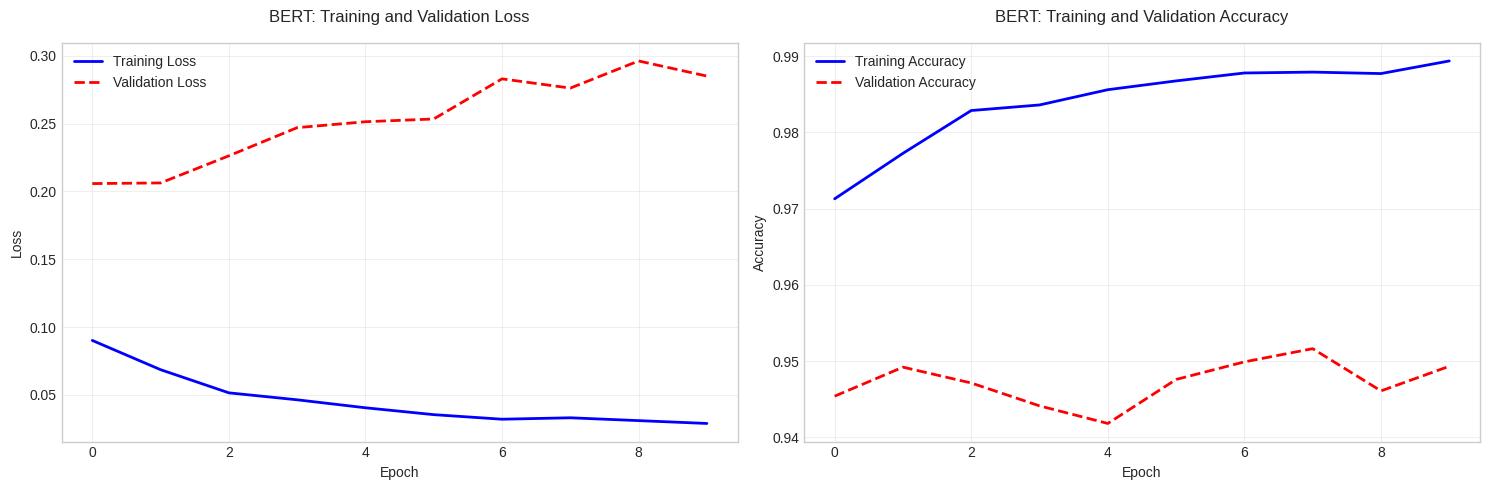

In [ ]:
bert_evaluator.plot_training_history(history_bert.history)

Dari visualisasi line chart di atas dapat disimpulkan bahwa model sudah cukup baik dalam mengeksekusi data. Training loss konstan mendekati 0 serta training akurasi mendekati 1 mengindikasikan bahwa BERT efektif dalam proses pengolahan sentimen. Meskipun, adanya sedikit perbedaan antara kinerja training dan validation mengindikasikan bahwa model mungkin saja mengalami sedikit overfitting yang dipengaruhi oleh beberapa faktor internal.

#### **Confusion Matrix dan Classification Report**

**Confusion Matrix** memberikan gambaran detail tentang distribusi prediksi model. Matriks ini membantu untuk:
- Mengetahui jumlah prediksi benar (True Positives dan True Negatives).
- Mengidentifikasi jumlah kesalahan prediksi (False Positives dan False Negatives).

**Classification Report** mencakup metrik penting seperti:
- Precision: Proporsi prediksi benar terhadap semua prediksi positif.
- Recall: Proporsi prediksi benar terhadap semua sampel positif yang sebenarnya.
- F1-Score: Harmoni antara precision dan recall.

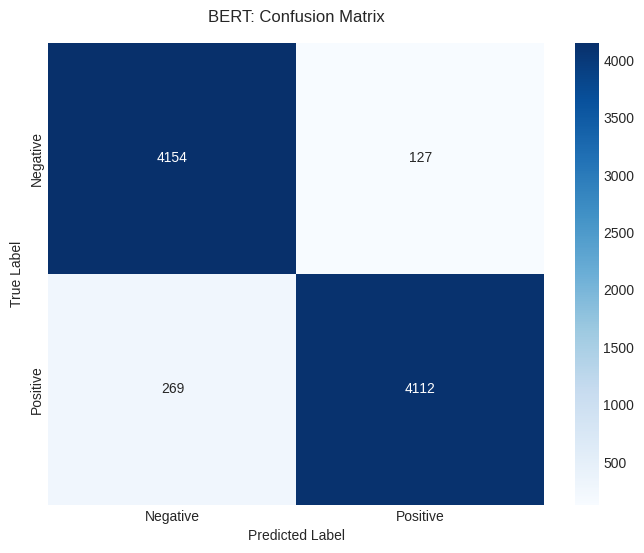


Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.97      0.95      4281
    Positive       0.97      0.94      0.95      4381

    accuracy                           0.95      8662
   macro avg       0.95      0.95      0.95      8662
weighted avg       0.95      0.95      0.95      8662



In [ ]:
bert_evaluator.plot_confusion_matrix(y_test_le, y_pred_bert)

Berdasarkan hasil uji Naive bayes sebelumnya, dapat dilihat bahwa hasil confusion matrix BERT memiliki hasil distribusi yang jauh lebih baik. Data true yang sebelumnya berada di 3496 dan 3855, naik menjadi 4154 untuk negatif dan 4112 untuk positif. Hal ini membuktikan bahwa proses distribusi jauh lebih baik walau untuk Naive Bayes sendiri sudah bisa dikatakan baik juga.

Untuk classification report juga sama, yakni hasil dari model BERT dapat dinilai perbedaan yang cukup signifikan dari pengujian sebelumnya. Hasil paling penting yaitu nilai akurasi berkembang dari yang sebelumnya 85% meningkat menjadi 95%. Hal itu juga sejalan dengan parameter lain seperti nilai precision, recall, dan juga f1-score.

#### **Plot ROC Curve**

ROC (Receiver Operating Characteristic) Curve menunjukkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)** pada berbagai ambang batas probabilitas. Area di bawah kurva (AUC) adalah indikator seberapa baik model membedakan antara kelas.

Keunggulan dari analisis ini:
- Menggambarkan performa model secara menyeluruh pada berbagai ambang batas probabilitas.
- AUC tinggi menunjukkan kemampuan model untuk memprediksi dengan baik, bahkan pada dataset yang tidak seimbang.

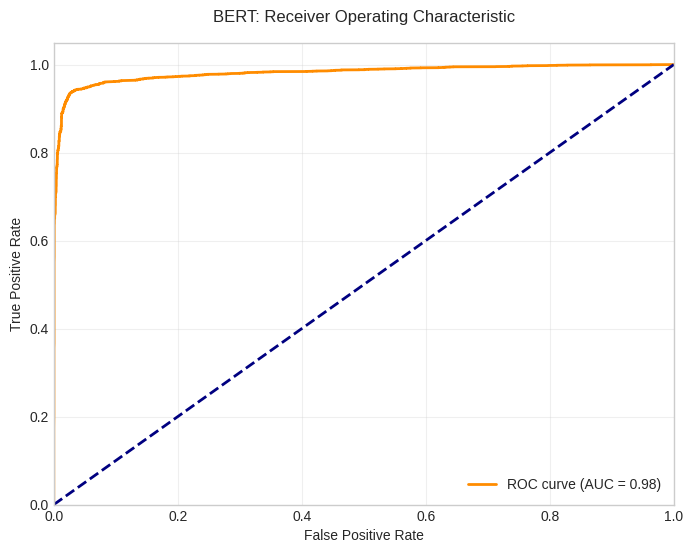

In [ ]:
bert_evaluator.plot_roc_curve(y_test_le, y_pred_proba_bert[:, 1])

Untuk ROC juga sudah pasti lebih baik di mana nilai dari AUC nya mencapai 0.98 yang dibanding dengan nilai sebelumnya hanya berkisar di 0.92

#### **Precision-Recall Curve**

Grafik ini sangat berguna jika dataset memiliki distribusi kelas yang tidak seimbang. Kurva ini menunjukkan hubungan antara **Precision** dan **Recall** pada berbagai ambang batas.

Tujuan:
- Membantu memilih ambang batas probabilitas yang optimal, terutama ketika trade-off antara precision dan recall menjadi penting.
- Area di bawah Precision-Recall Curve juga menjadi indikator performa model.

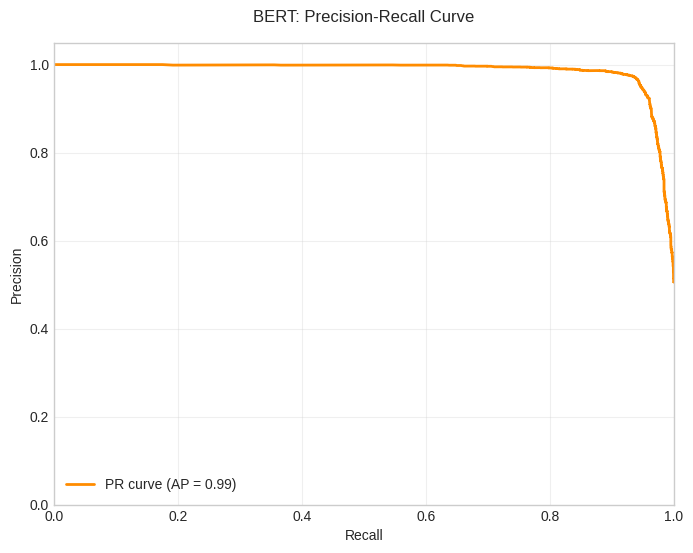

In [ ]:
bert_evaluator.plot_precision_recall_curve(y_test_le, y_pred_proba_bert[:, 1])

Precision - recall juga sama yakni meningkat dari yang sebelumnya 0.93 naik menjadi 0.99, yang hampir mencapai 1.

#### **Analisis Misclassifications**

Menampilkan sampel teks yang salah diklasifikasikan oleh model. Analisis ini penting untuk:
- Mengidentifikasi pola kesalahan model, misalnya apakah model kesulitan memahami konteks tertentu.
- Memberikan wawasan tentang langkah-langkah perbaikan, seperti pelatihan ulang pada data yang lebih beragam atau penambahan fitur tambahan.


Total misclassified samples: 396

Misclassification rate: 4.57%

Sample misclassified instances:

Text: ['prabowo president']
True label: 1
Predicted label: 0

Text: ['long live anie president ke']
True label: 0
Predicted label: 1

Text: ['continue pak prabowo subianto pray president future']
True label: 1
Predicted label: 0

Text: ['prabowo subiantos chance run presidential candidate great central java governor gangar pranowo not run indonesia cancellation host world cup ganjar get dimmer']
True label: 1
Predicted label: 0

Text: ['firstly supporter anie dki later secondly mister jokowi say cebongkampretkadrun follow president advice completely contrary mister jokowis wish']
True label: 0
Predicted label: 1


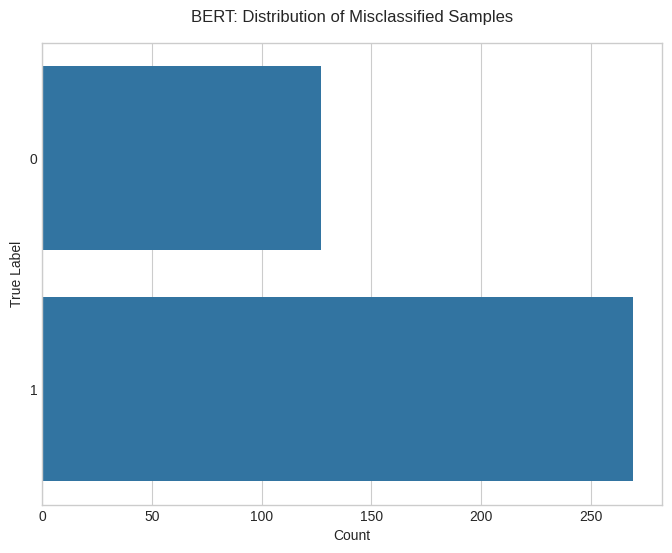

In [ ]:
bert_evaluator.plot_misclassifications(y_test_le, y_pred_bert, X_test)

Pada misclassification, model BERT memberikan hasil yang jauh berbeda. Sampel misclassified turun dari yang sebelumnya di 15.14% dengan total 1311 sampel, turun menjadi 4.57% dengan total sampel mencapai di 396 sampel.

### **11.6 Hasil Model BERT**

Setelah evaluasi dilakukan, performa model BERT dalam klasifikasi sentimen menunjukkan hasil yang sangat baik. Model ini mencapai **akurasi keseluruhan sebesar 95%**, yang menegaskan kemampuan model untuk memprediksi dengan benar sebagian besar sampel pada dataset uji.

Secara khusus, untuk metrik **precision**, model mencapai **94%** pada kelas `Negative` dan **97%** pada kelas `Positive`. Ini menunjukkan bahwa prediksi positif model sangat andal, dengan tingkat kesalahan minimal pada kedua kelas. Sementara itu, untuk **recall**, model mampu menangkap **97%** dari semua instance `Negative` yang benar-benar ada dan **94%** dari instance `Positive`, menandakan bahwa model tidak banyak melewatkan data penting dari masing-masing kategori.

Selain itu, **F1-score** untuk kedua kelas sama-sama tinggi, yaitu **95%**, mencerminkan keseimbangan yang baik antara precision dan recall. Dengan dukungan data sebanyak 4.281 instance untuk kelas `Negative` dan 4.381 instance untuk kelas `Positive`, model ini menunjukkan performa yang konsisten di berbagai metrik evaluasi, baik untuk rata-rata makro maupun rata-rata tertimbang, dengan skor **95%**.

Hasil ini mengindikasikan bahwa model BERT sangat efektif dalam memahami konteks dan struktur bahasa pada tugas klasifikasi sentimen. Beberapa kesalahan prediksi yang terjadi kemungkinan besar disebabkan oleh ambiguitas teks atau data yang sulit dikelompokkan secara jelas ke salah satu kelas. Untuk langkah berikutnya, peningkatan performa dapat dicapai dengan memperluas dataset, melakukan fine-tuning lebih dalam pada model, atau menyesuaikan hiperparameter untuk skenario spesifik. Secara keseluruhan, model ini sudah cukup andal untuk diterapkan pada tugas klasifikasi sentimen di dunia nyata.